In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation stage

Globally there is one problem with the dataset. By unknown reason (this was detected only on the V2 subgraph description) exchange position size works with next rule: + represents long and - represents short. Exchange position notional demonstrates capitalization of the applied changes and signs are different - + represents short position in this case and - represents long position. To ease analysis of the data and make the data analyzable sign of the column ```exchange_position_notional``` will be changed.

In [107]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit='s')
position_changes_df["exchanged_position_notional"] = -position_changes_df["exchanged_position_notional"]
position_changes_df

id  \
0        0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...   
1        0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...   
2        0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...   
3        0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...   
4        0x548dd8a96b9faa92066283339832e380fd506f4ebc94...   
...                                                    ...   
1834858  0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...   
1834859  0x1ec3f79f957587b332572447f288b15ad1196a7e760a...   
1834860  0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...   
1834861  0x978645e43b1779dae628ed4df8a0350803d161c8fef1...   
1834862  0xc3498429c7f1a0dc7049021032e86cdcc673b9e81c3b...   

                                                   tx_hash  \
0        0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...   
1        0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...   
2        0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...   
3        0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...   
4        0x548dd8a96b9faa92066283339832e380fd506f4ebc94...   
...                                                    ...   
1834858  0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...   
1834859  0x1ec3f79f957587b332572447f288b15ad1196a7e760a...   
1834860  0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...   
1834861  0x978645e43b1779dae628ed4df8a0350803d161c8fef1...   
1834862  0xc3498429c7f1a0dc7049021032e86cdcc673b9e81c3b...   

                                             trader  \
0        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
1        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
2        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
3        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
4        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
...                                             ...   
1834858  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   
1834859  0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281   
1834860  0x4b4f526b450c75f3cb0e9aa0a0b5480e4b0c478a   
1834861  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1834862  0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   

                                         base_token  exchanged_position_size  \
0        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055019   
1        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055098   
2        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.729828   
3        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.728137   
4        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.729264   
...                                             ...                      ...   
1834858  0xb24f50dd9918934ab2228be7a097411ca28f6c14               -32.999902   
1834859  0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2               128.952896   
1834860  0x151bb01c79f4516c233948d69dae39869bccb737               -25.872016   
1834861  0xbe5de48197fc974600929196239e264ecb703ee8              3371.136364   
1834862  0x5faa136fc58b6136ffdaeaac320076c4865c070f                10.388006   

         exchanged_position_notional       fee  open_notional  realized_pnl  \
0                        2997.000000  3.000000  -15000.000000      0.000000   
1                        2997.000000  3.000000   -9000.000000      0.000000   
2                        2997.000000  3.000000   -3000.000000      0.000000   
3                        2997.000000  3.000000  -12000.000000      0.000000   
4                        2997.000000  3.000000   -6000.000000      0.000000   
...                              ...       ...            ...           ...   
1834858                 -3023.793838  3.023794  -14962.556823     -9.172361   
1834859                  2594.732513  2.597330    8420.360981     -0.556983   
1834860                 -2596.910612  2.596911    7150.315804      0.000000   
1834861                  4297.643387  0.000000   85634.249350    -31.434297   
1834862                   732.660585  0.000000  243309.159938     -5.146219

In [108]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

position_changes_df["pool_name"] = position_changes_df["base_token"].replace(tokens_addresses_to_names_dict)
position_changes_df["day_of_year"] = position_changes_df["time"].dt.dayofyear

# PnL and capitalization of position changes respective to traders count

In [109]:
daily_grouped_position_changes_df = position_changes_df[["fee", "realized_pnl", "exchanged_position_notional", "day_of_year", "trader"]
                                                               ].groupby(["day_of_year"]).sum()
daily_traders_count_df = position_changes_df[["day_of_year", "trader"]].groupby(["day_of_year"]).nunique()

In [110]:
len(position_changes_df["trader"].unique())

11443

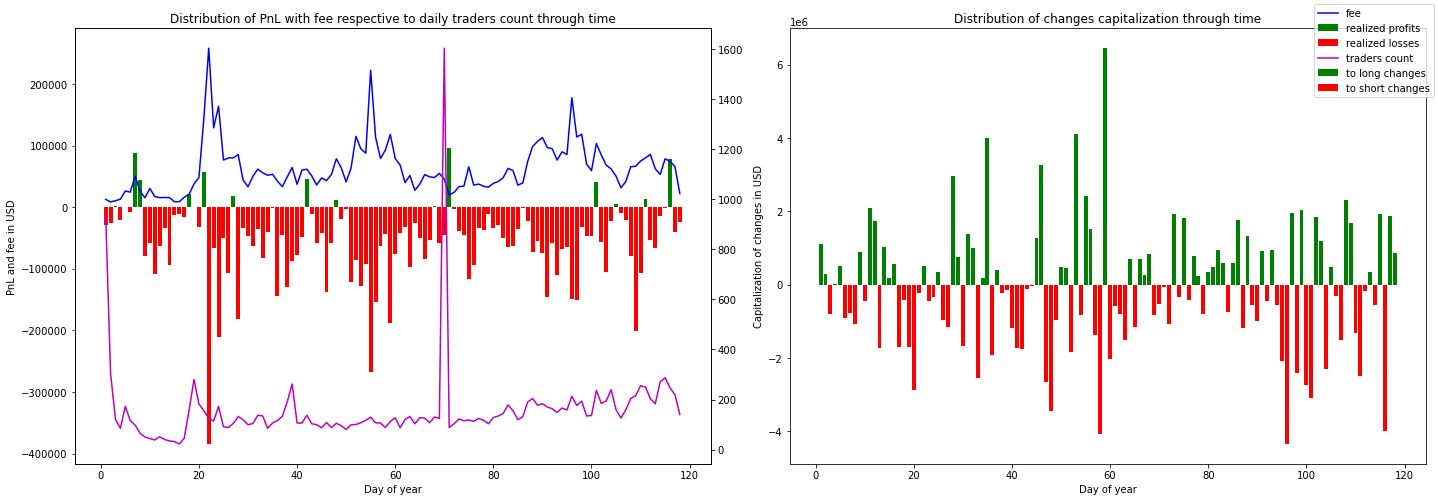

In [142]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 2, 1)
ax2 = ax.twinx()
ax.plot(daily_grouped_position_changes_df[daily_grouped_position_changes_df.index < 200].index, 
        daily_grouped_position_changes_df[daily_grouped_position_changes_df.index < 200]["fee"],
        color='b', label='fee')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] > 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] > 0)]["realized_pnl"],
        color='g', label='realized profits')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] < 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] < 0)]["realized_pnl"],
        color='r', label='realized losses')
ax2.plot(daily_traders_count_df[daily_traders_count_df.index < 200].index, 
         daily_traders_count_df[daily_traders_count_df.index < 200]["trader"], color='m', label="traders count")
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fee in USD")
ax.set_title("Distribution of PnL with fee respective to daily traders count through time")

ax = fig.add_subplot(1, 2, 2)
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] > 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] > 0)]["exchanged_position_notional"],
        color='g', label='to long changes')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] < 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] < 0)]["exchanged_position_notional"],
        color='r', label='to short changes')
ax.set_xlabel("Day of year")
ax.set_ylabel("Capitalization of changes in USD")
ax.set_title("Distribution of changes capitalization through time")

fig.legend()
fig.tight_layout()
plt.show()

There are some interesting observations:

1. Conform PnL distribution can be see that one the best days from perspective of profits happened right after anomalous rise of the trading activity between 5-15 March 2022. In other periods traders got extreme losses.
2. Overall tendency of the traders is closer to change positions closer to long ones (conform results of the daily sum);
3. Most of the time traders count is deviating around 200 traders involved in making positions changes for each day

It is required to see sum of profits, sum of losses to better review overall situation around PnL and sum of "short shifts" (when trader either decreases size of long or increases short) and sum of "long shifts" (when trader either inreases long position size or decreases short one)

# Daily profits sum, losses sum, "long shifts" sum and "short shifts" sum

In [143]:
daily_profits_df = position_changes_df[position_changes_df["realized_pnl"] > 0][["day_of_year", "realized_pnl", "fee"]
                                                                                ].groupby("day_of_year").sum()
daily_losses_df = position_changes_df[position_changes_df["realized_pnl"] < 0][["day_of_year", "realized_pnl", "fee"]
                                                                                ].groupby("day_of_year").sum()

daily_long_shifts_df = position_changes_df[position_changes_df["exchanged_position_notional"] > 0][["day_of_year", "exchanged_position_notional"]
                                                                                ].groupby("day_of_year").mean()
daily_short_shifts_df = position_changes_df[position_changes_df["exchanged_position_notional"] < 0][["day_of_year", "exchanged_position_notional"]
                                                                                ].groupby("day_of_year").mean()

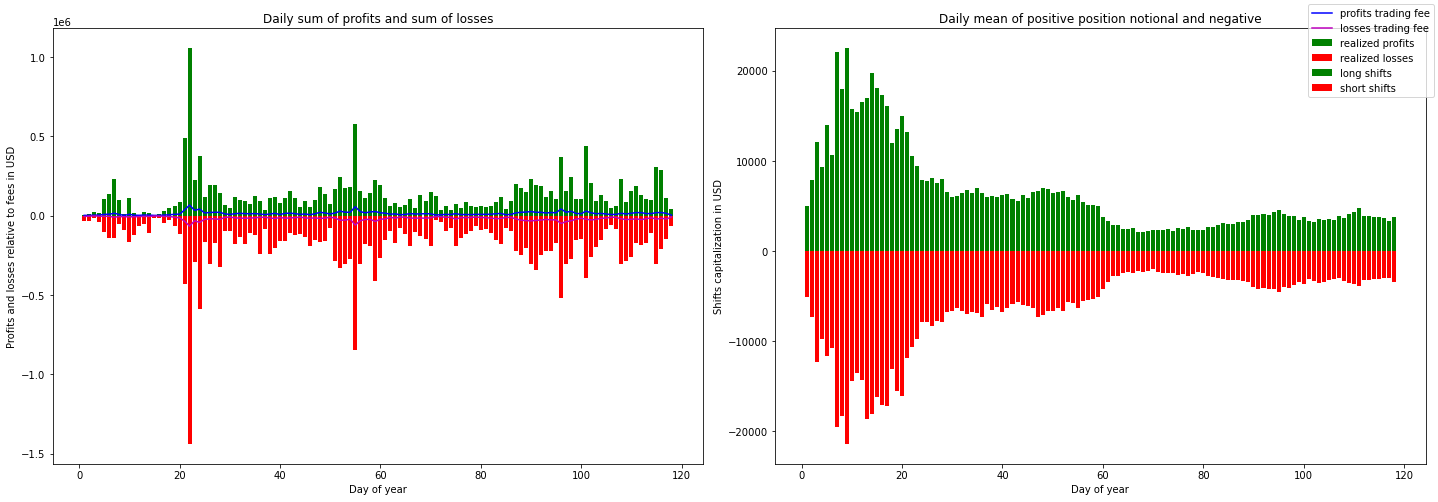

In [145]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 2, 1)
ax.bar(daily_profits_df[(daily_profits_df.index < 200)].index, 
        daily_profits_df[(daily_profits_df.index < 200)]["realized_pnl"],
        color='g', label='realized profits')
ax.bar(daily_losses_df[(daily_losses_df.index < 200)].index, 
        daily_losses_df[(daily_losses_df.index < 200)]["realized_pnl"],
        color='r', label='realized losses')
ax.plot(daily_profits_df[(daily_profits_df.index < 200)].index, 
        daily_profits_df[(daily_profits_df.index < 200)]["fee"],
        color='b', label='profits trading fee')
ax.plot(daily_losses_df[(daily_losses_df.index < 200)].index, 
        -daily_losses_df[(daily_losses_df.index < 200)]["fee"],
        color='m', label='losses trading fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Profits and losses relative to fees in USD")
ax.set_title("Daily sum of profits and sum of losses")

ax = fig.add_subplot(1, 2, 2)
ax.bar(daily_long_shifts_df[(daily_long_shifts_df.index < 200)].index, 
        daily_long_shifts_df[(daily_long_shifts_df.index < 200)]["exchanged_position_notional"],
        color='g', label='long shifts')
ax.bar(daily_short_shifts_df[(daily_short_shifts_df.index < 200)].index, 
        daily_short_shifts_df[(daily_short_shifts_df.index < 200)]["exchanged_position_notional"],
        color='r', label='short shifts')
ax.set_xlabel("Day of year")
ax.set_ylabel("Shifts capitalization in USD")
ax.set_title("Daily mean of positive position notional and negative")

fig.legend()
fig.tight_layout()
plt.show()

In [114]:
print("sum of collected pnl " + str(position_changes_df["realized_pnl"].sum()))
print("sum of collected fees " + str(position_changes_df["fee"].sum()))

sum of collected pnl -6701636.006961406
sum of collected fees 7769810.491511692


# Daily profits sum, losses sum, long shifts sum and short shifts sum for each pool

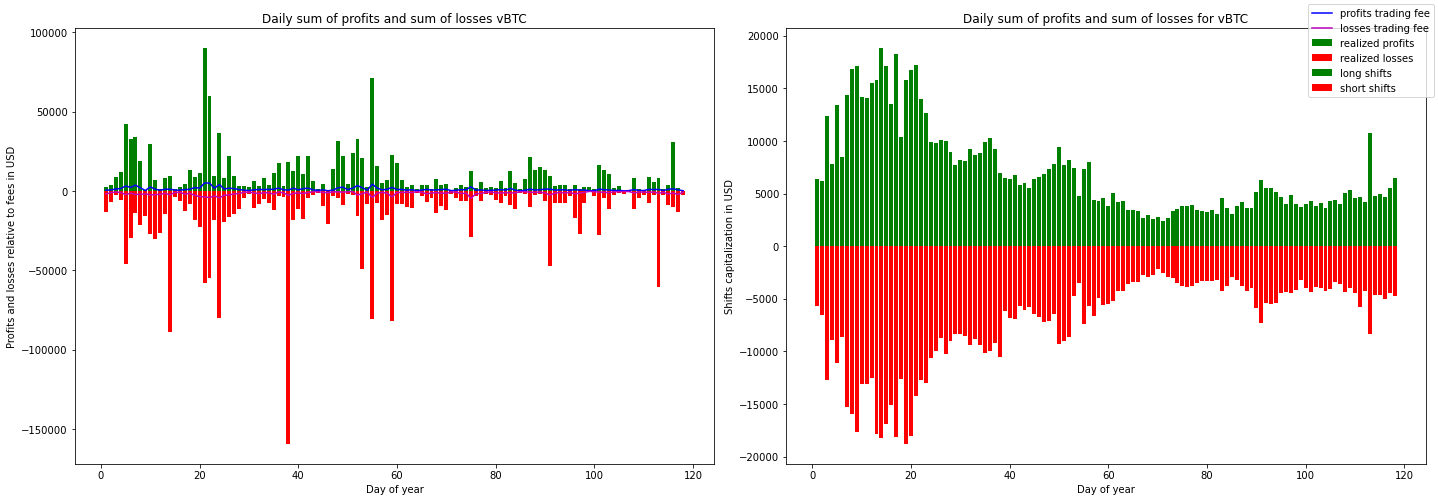

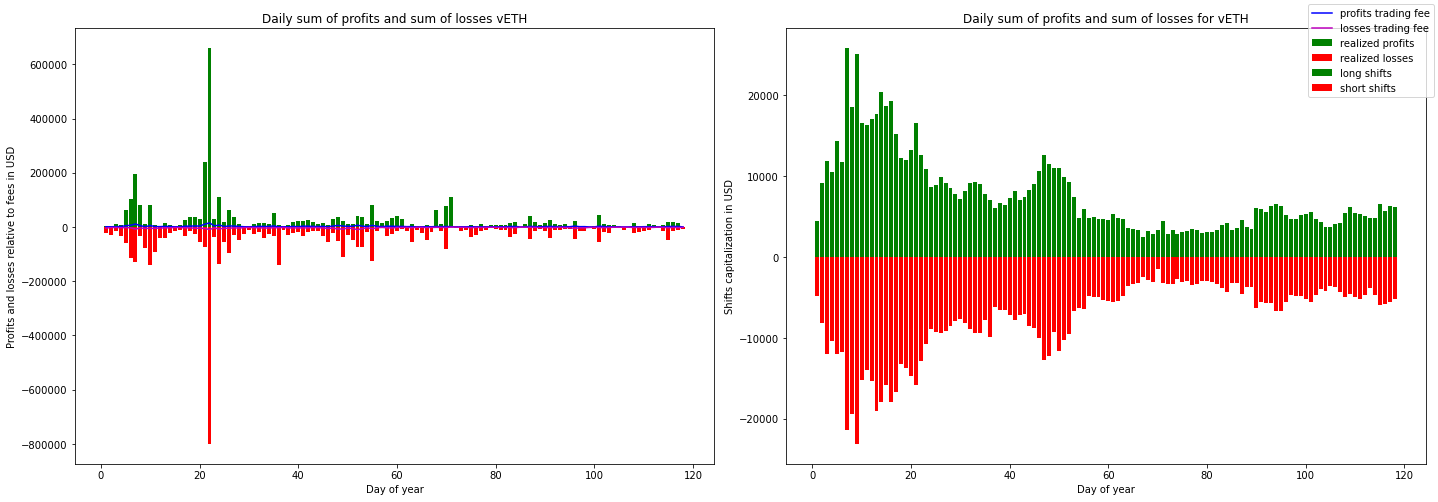

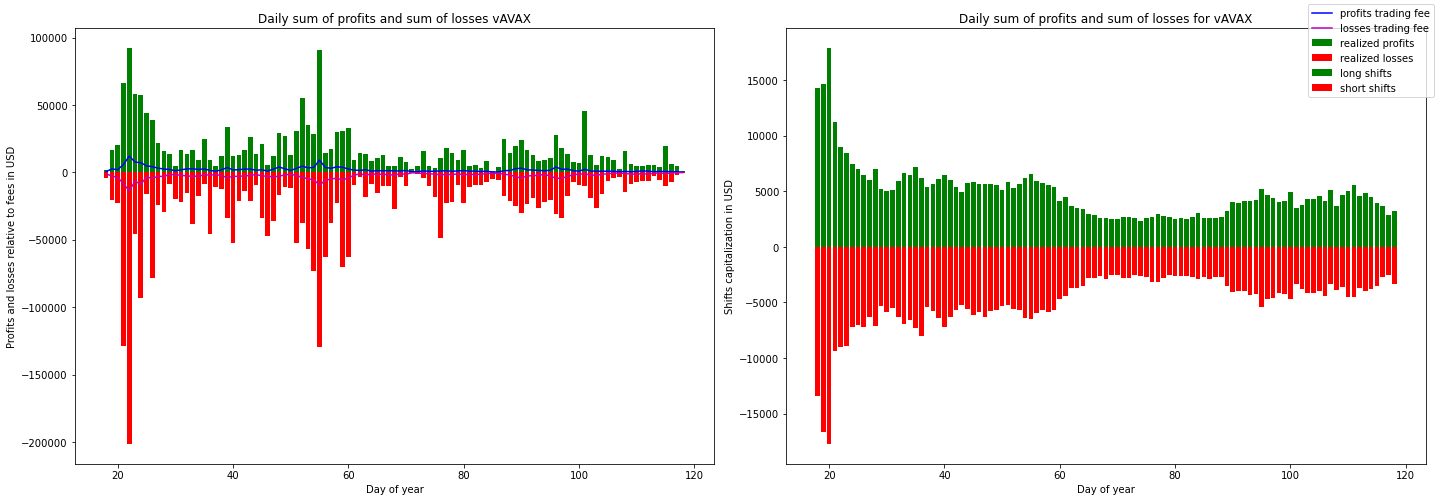

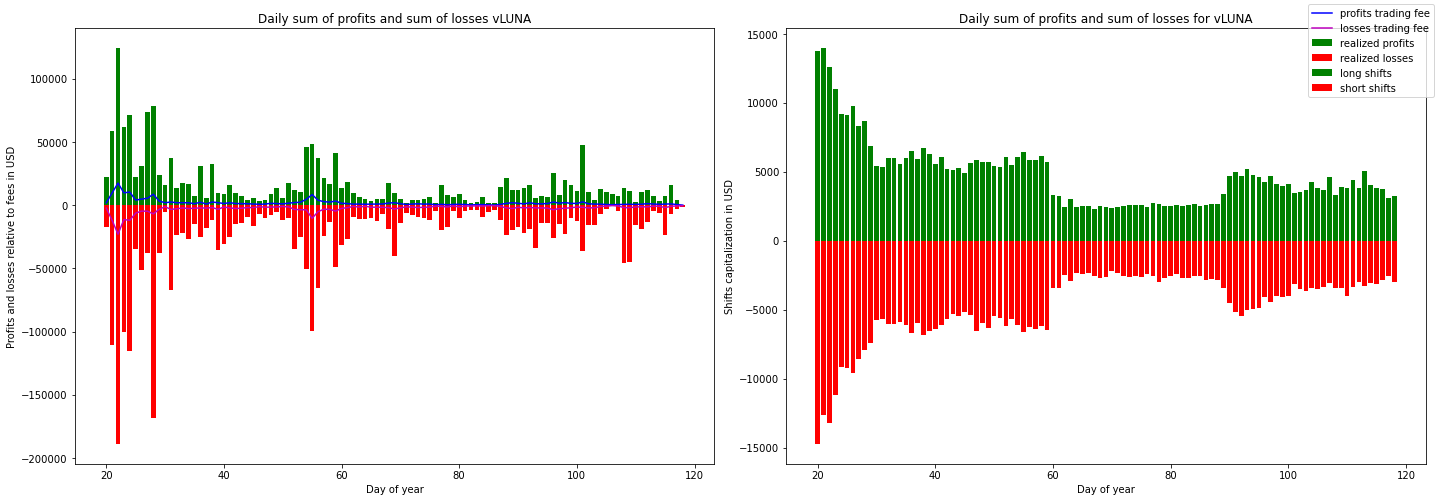

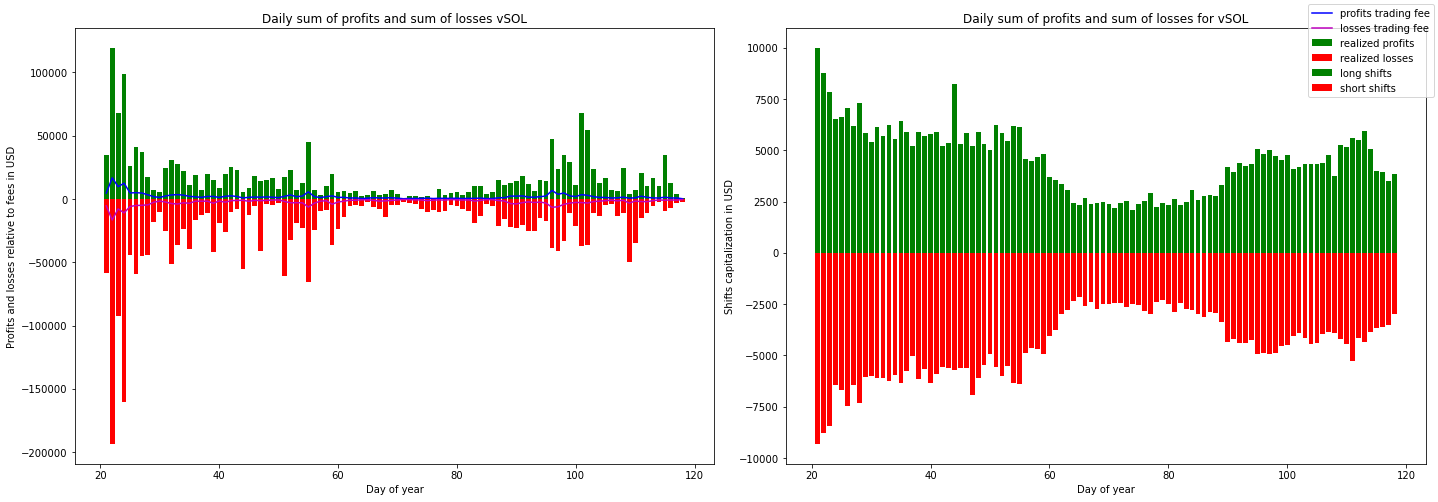

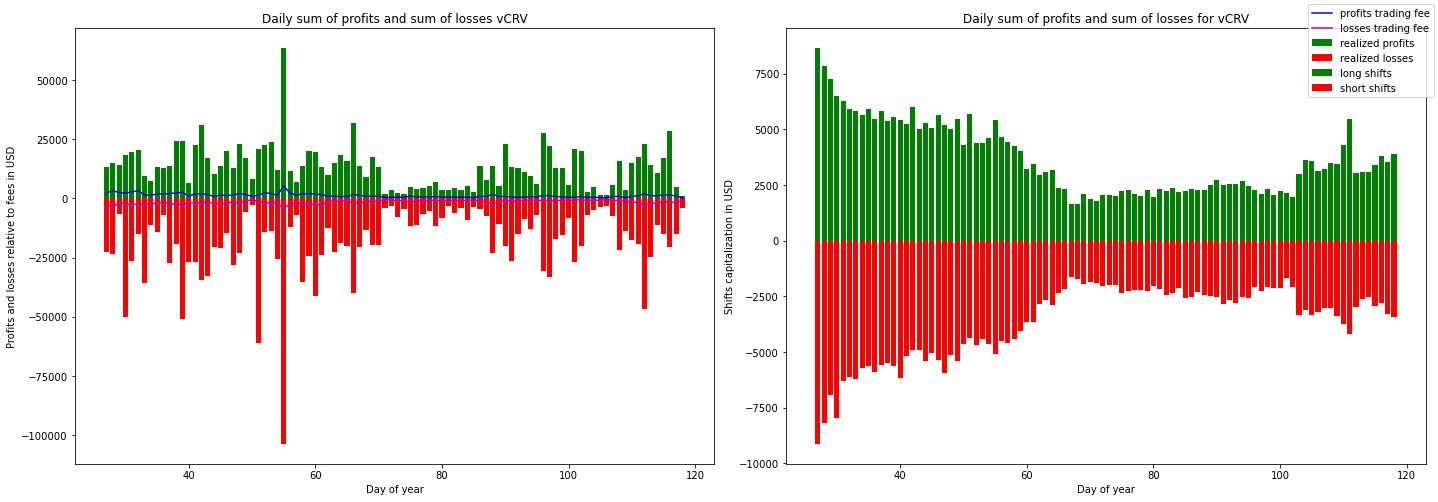

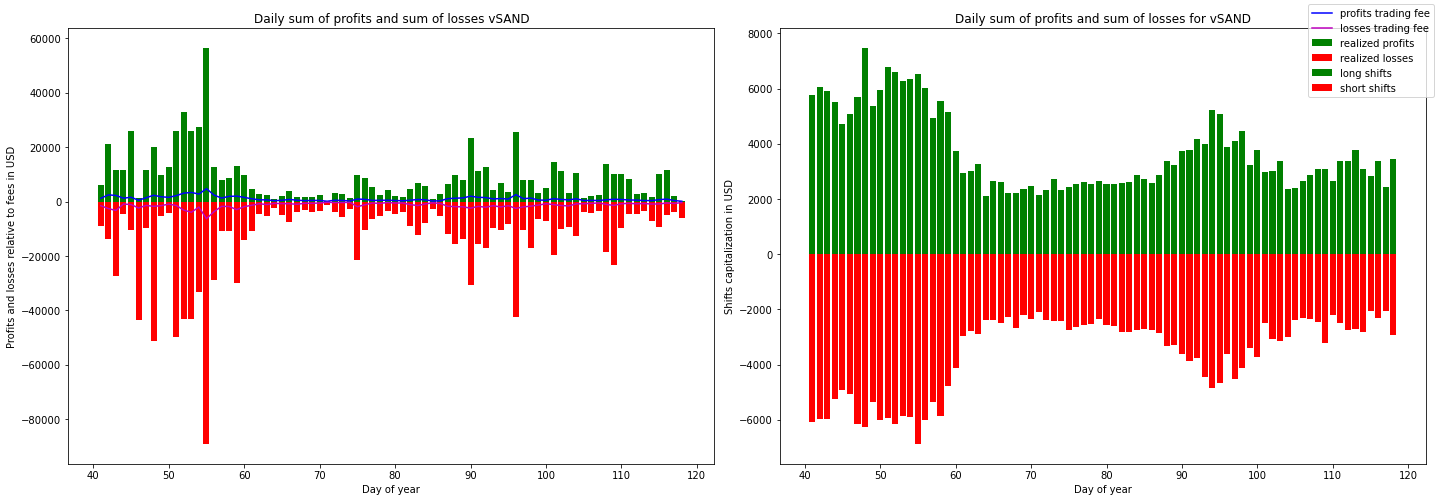

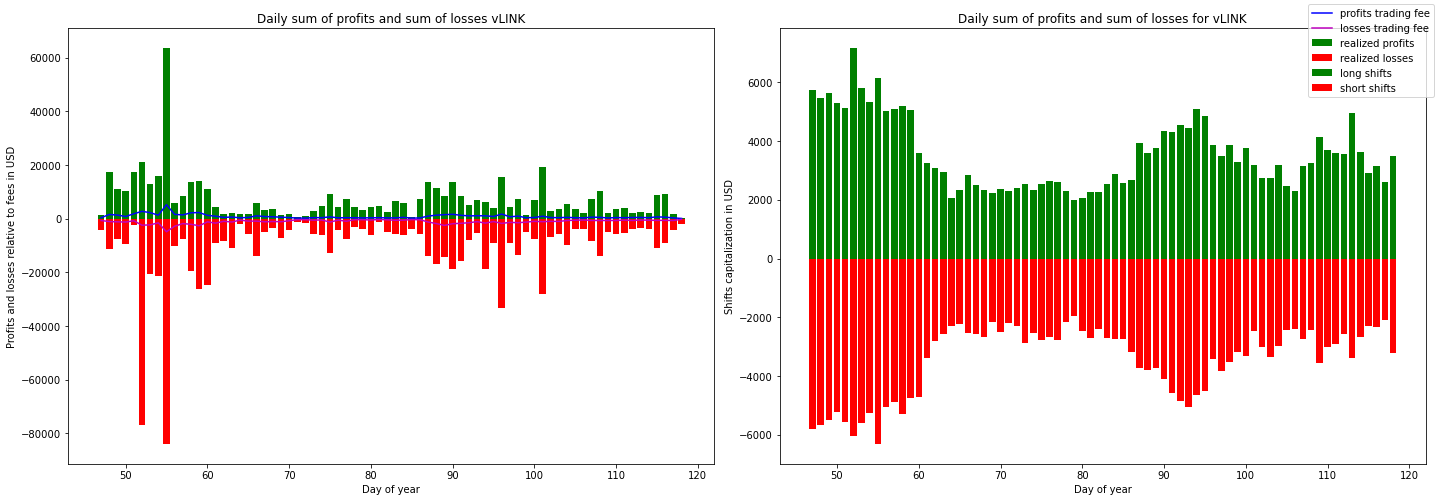

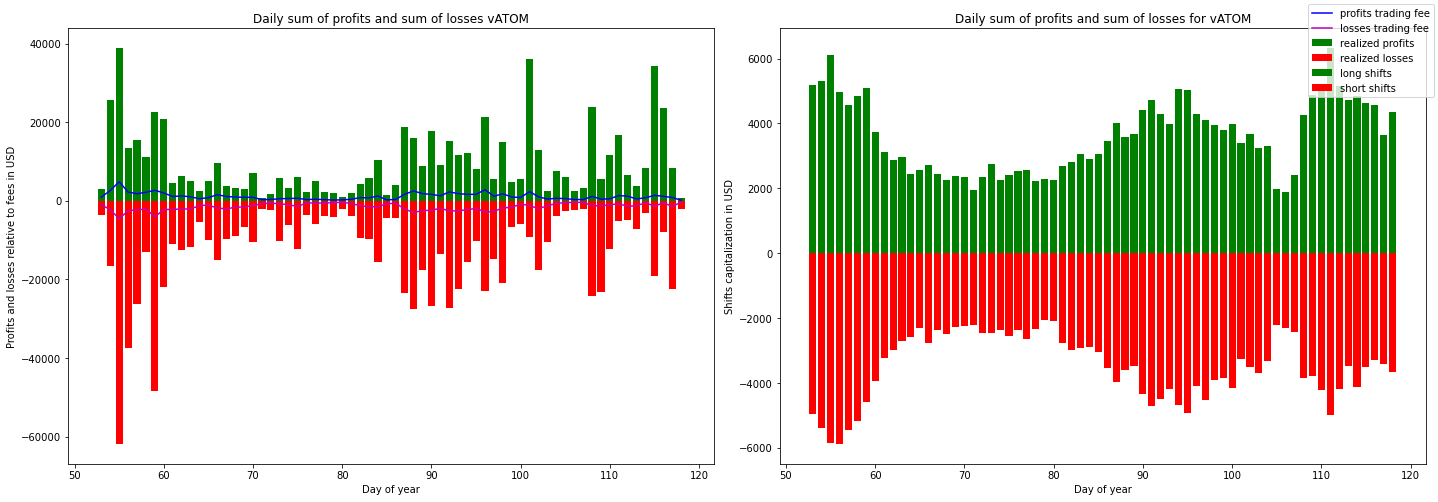

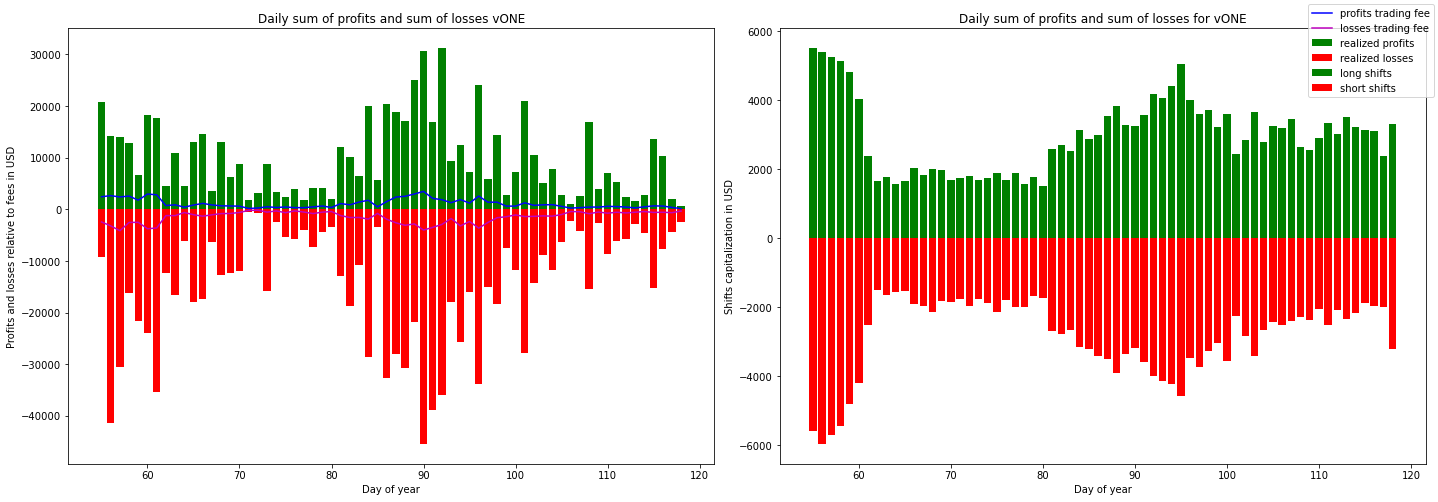

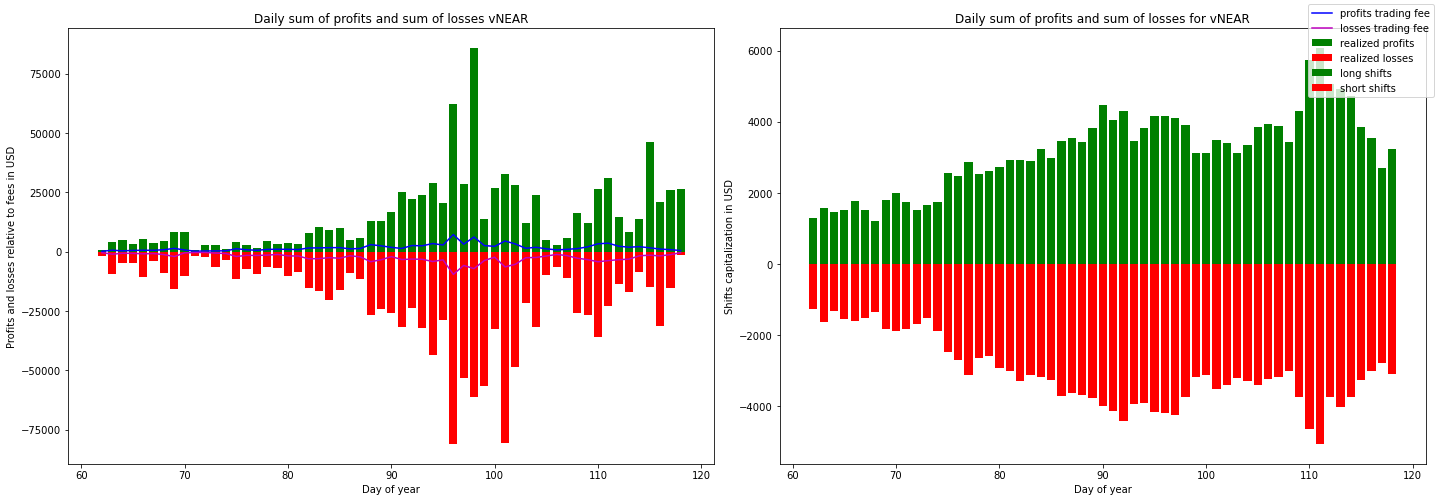

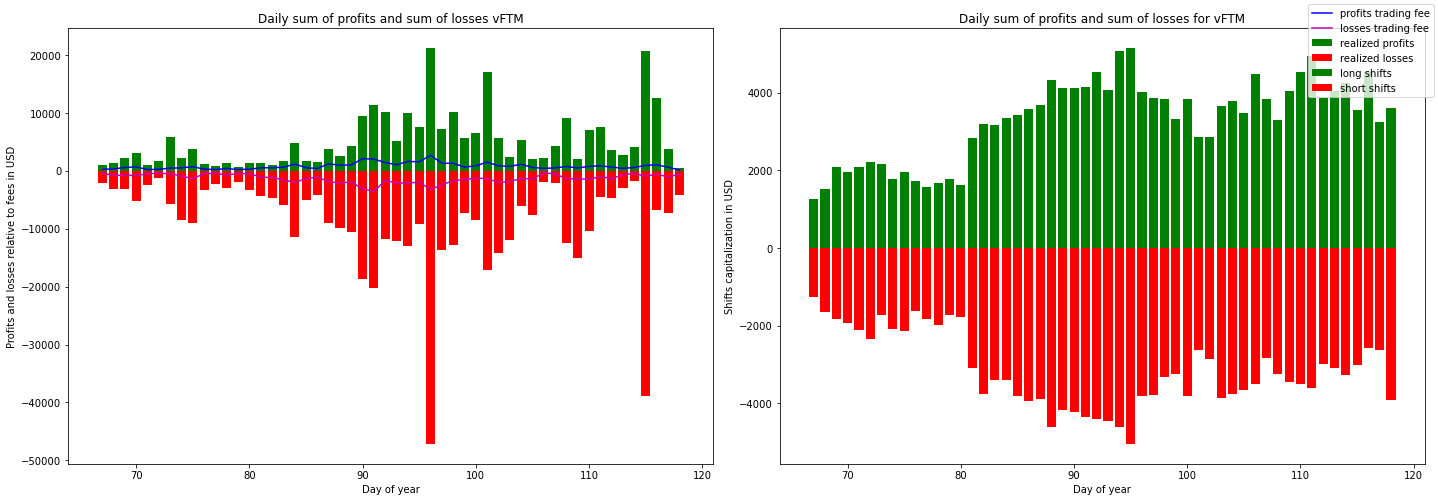

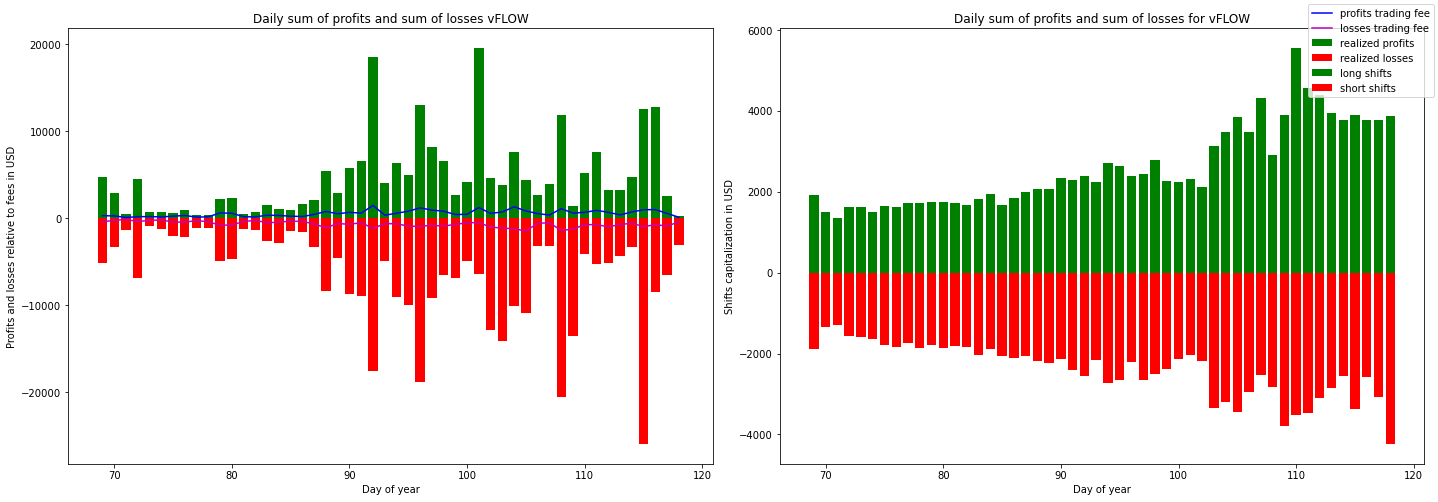

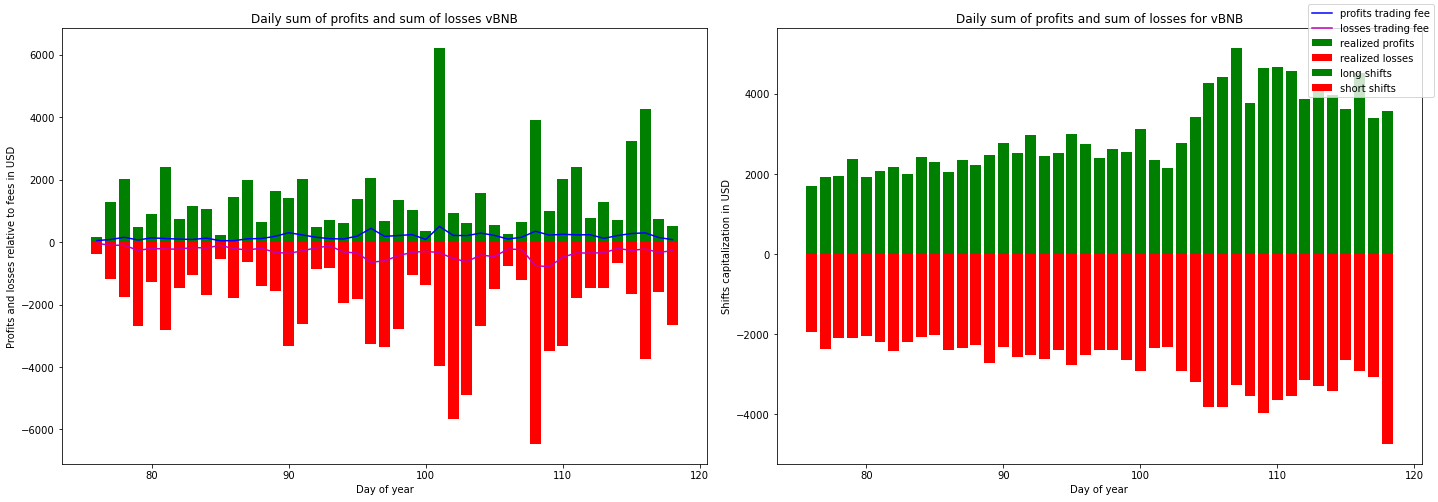

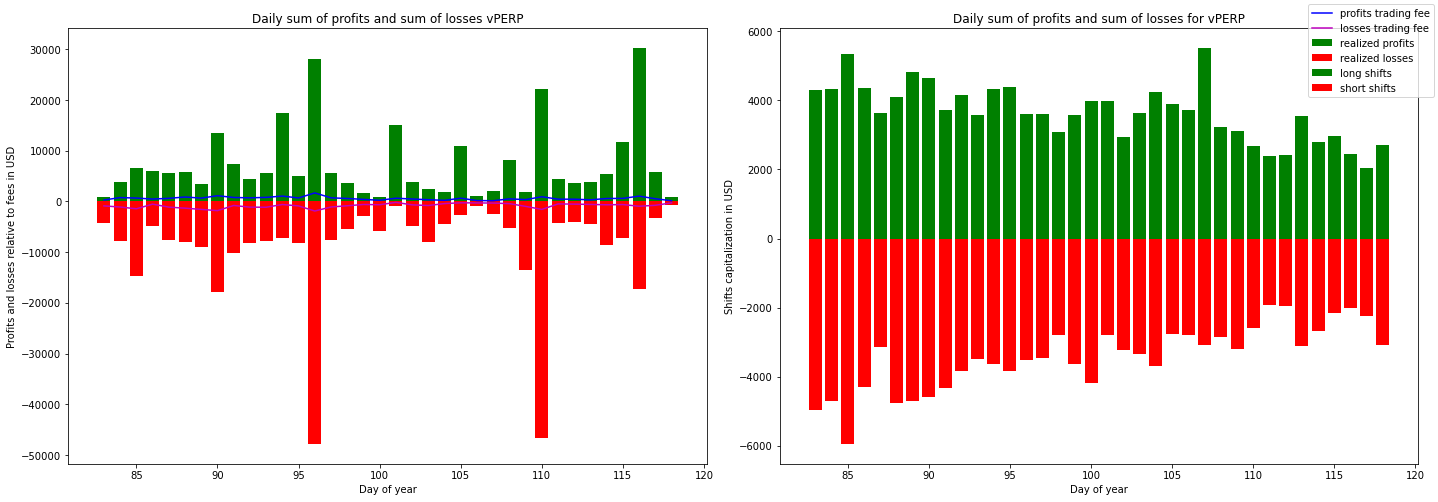

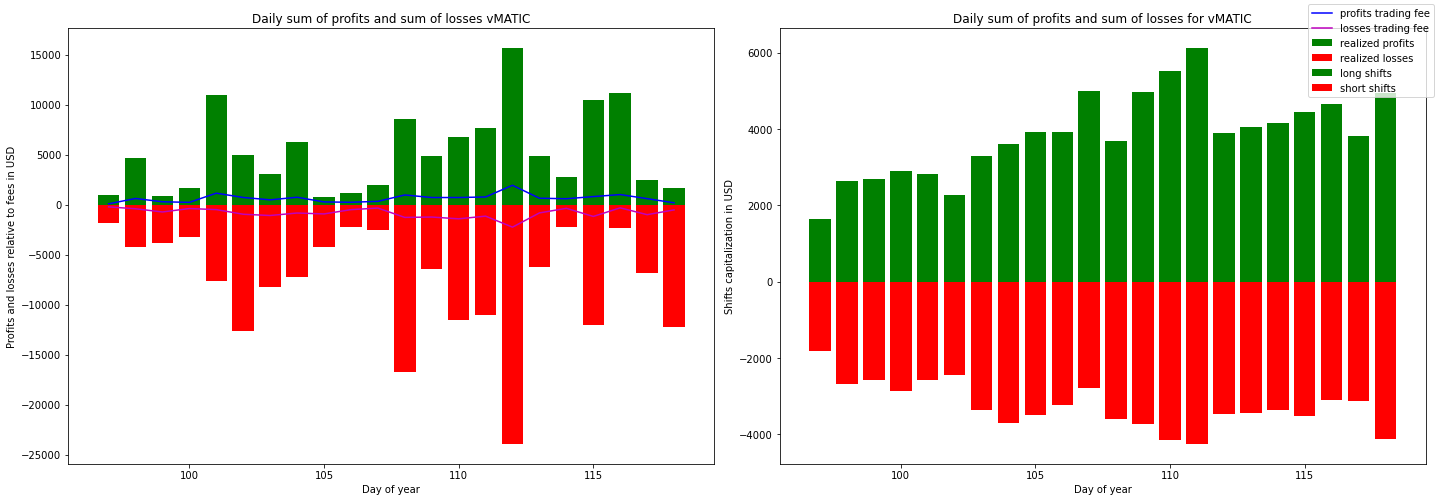

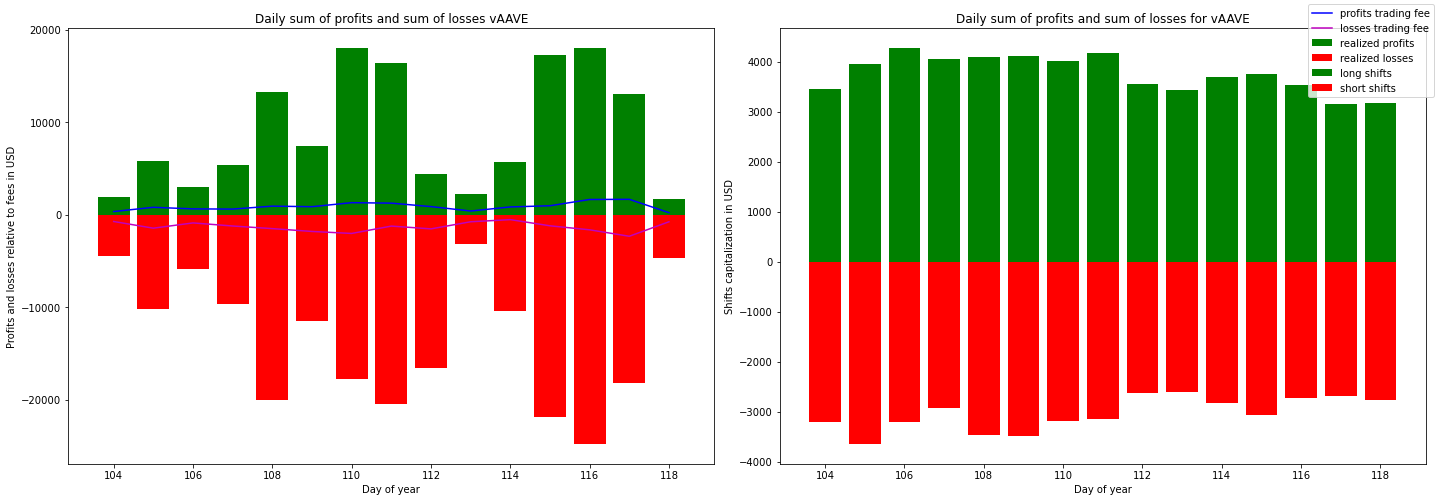

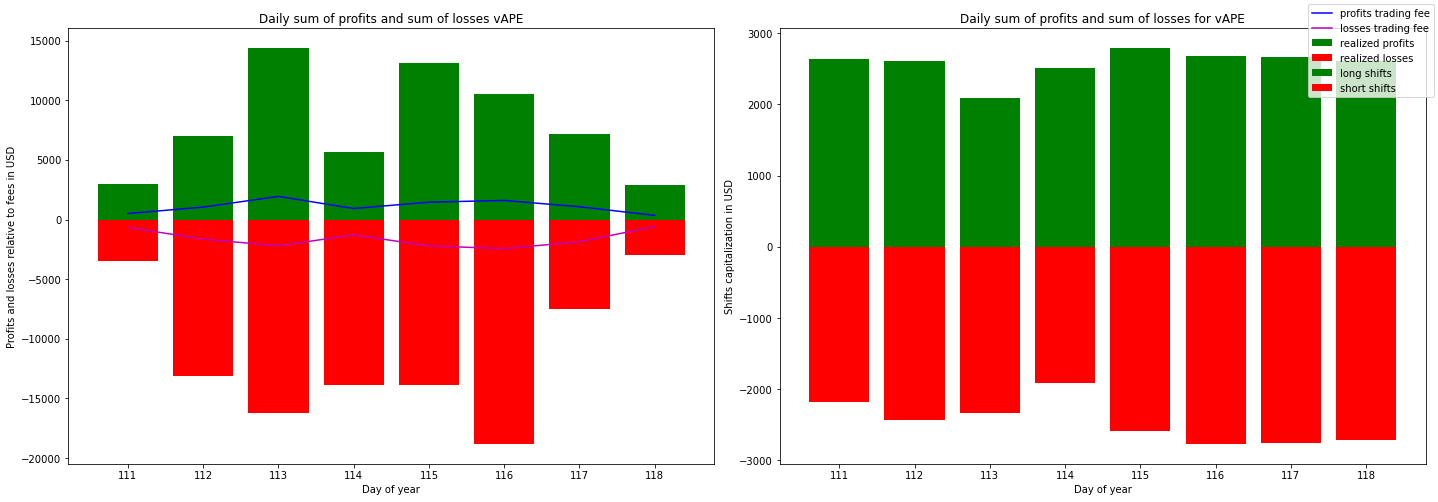

In [146]:
for pool in position_changes_df["pool_name"].unique():
    pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]

    daily_profits_df = pool_position_changes_df[pool_position_changes_df["realized_pnl"] > 0][["day_of_year", "realized_pnl", "fee"]
                                                                                    ].groupby("day_of_year").sum()
    daily_losses_df = pool_position_changes_df[pool_position_changes_df["realized_pnl"] < 0][["day_of_year", "realized_pnl", "fee"]
                                                                                    ].groupby("day_of_year").sum()

    daily_long_shifts_df = pool_position_changes_df[pool_position_changes_df["exchanged_position_notional"] > 0][["day_of_year", 
                                                                                                        "exchanged_position_notional"]
                                                                                    ].groupby("day_of_year").mean()
    daily_short_shifts_df = pool_position_changes_df[pool_position_changes_df["exchanged_position_notional"] < 0][["day_of_year", 
                                                                                                         "exchanged_position_notional"]
                                                                                    ].groupby("day_of_year").mean()
    
    fig = plt.figure(figsize=(20, 7))

    ax = fig.add_subplot(1, 2, 1)
    ax.bar(daily_profits_df[(daily_profits_df.index < 200)].index, 
            daily_profits_df[(daily_profits_df.index < 200)]["realized_pnl"],
            color='g', label='realized profits')
    ax.bar(daily_losses_df[(daily_losses_df.index < 200)].index, 
            daily_losses_df[(daily_losses_df.index < 200)]["realized_pnl"],
            color='r', label='realized losses')
    ax.plot(daily_profits_df[(daily_profits_df.index < 200)].index, 
            daily_profits_df[(daily_profits_df.index < 200)]["fee"],
            color='b', label='profits trading fee')
    ax.plot(daily_losses_df[(daily_losses_df.index < 200)].index, 
            -daily_losses_df[(daily_losses_df.index < 200)]["fee"],
            color='m', label='losses trading fee')
    ax.set_xlabel("Day of year")
    ax.set_ylabel("Profits and losses relative to fees in USD")
    ax.set_title("Daily sum of profits and sum of losses " + pool)

    ax = fig.add_subplot(1, 2, 2)
    ax.bar(daily_long_shifts_df[(daily_long_shifts_df.index < 200)].index, 
            daily_long_shifts_df[(daily_long_shifts_df.index < 200)]["exchanged_position_notional"],
            color='g', label='long shifts')
    ax.bar(daily_short_shifts_df[(daily_short_shifts_df.index < 200)].index, 
            daily_short_shifts_df[(daily_short_shifts_df.index < 200)]["exchanged_position_notional"],
            color='r', label='short shifts')
    ax.set_xlabel("Day of year")
    ax.set_ylabel("Shifts capitalization in USD")
    ax.set_title("Daily sum of profits and sum of losses for " + pool)

    fig.legend()
    fig.tight_layout()
    plt.show()

# Open Notional analysis

Conform the description this is the column representing mean notional value of the position after current transaction. Considering this, it can represent overall tendency of the position to be long-based or short-based

In [116]:
daily_open_notional_df = position_changes_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()

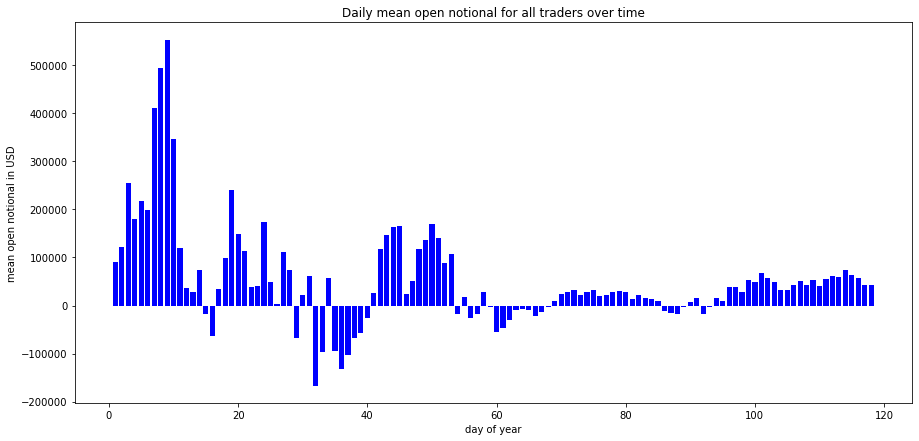

In [117]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(daily_open_notional_df[daily_open_notional_df.index < 200].index,
       daily_open_notional_df[daily_open_notional_df.index < 200]["open_notional"],
       color='b')
ax.set_xlabel("day of year")
ax.set_ylabel("mean open notional in USD")
ax.set_title("Daily mean open notional for all traders over time")
plt.show()

In [118]:
daily_positive_open_notional_df = position_changes_df[position_changes_df["open_notional"] > 0][["day_of_year", "open_notional"]
                                                                                                ].groupby("day_of_year").mean()
daily_negative_open_notional_df = position_changes_df[position_changes_df["open_notional"] < 0][["day_of_year", "open_notional"]
                                                                                                ].groupby("day_of_year").mean()

There was discovered a very strange fact about the Subgraph data: while exchanged position size + represents long and - represents short, in case of reviewing exchanged position notional - represents long and + represents short. Therefore it is required to perform check of open notional respective to the exchanged position size

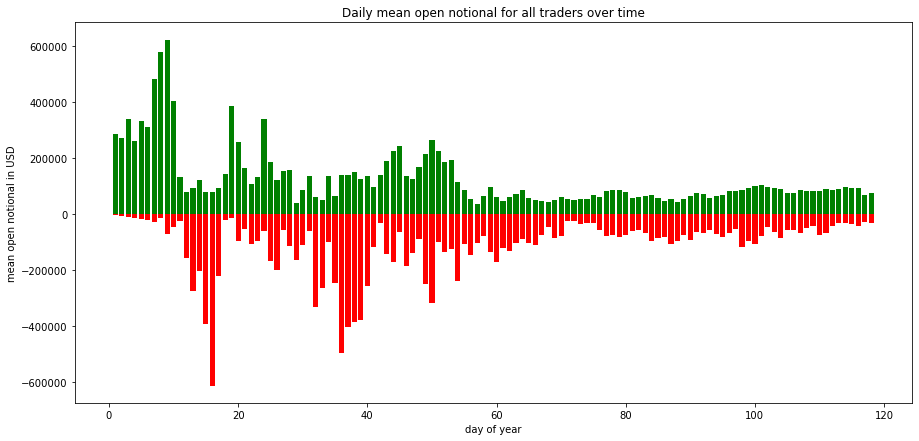

In [119]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(daily_positive_open_notional_df[daily_positive_open_notional_df.index < 200].index,
       daily_positive_open_notional_df[daily_positive_open_notional_df.index < 200]["open_notional"],
       color='g', label="daily positive open notional")
ax.bar(daily_negative_open_notional_df[daily_negative_open_notional_df.index < 200].index,
       daily_negative_open_notional_df[daily_negative_open_notional_df.index < 200]["open_notional"],
       color='r', label="daily negative open notional")
ax.set_xlabel("day of year")
ax.set_ylabel("mean open notional in USD")
ax.set_title("Daily mean open notional for all traders over time")
plt.show()

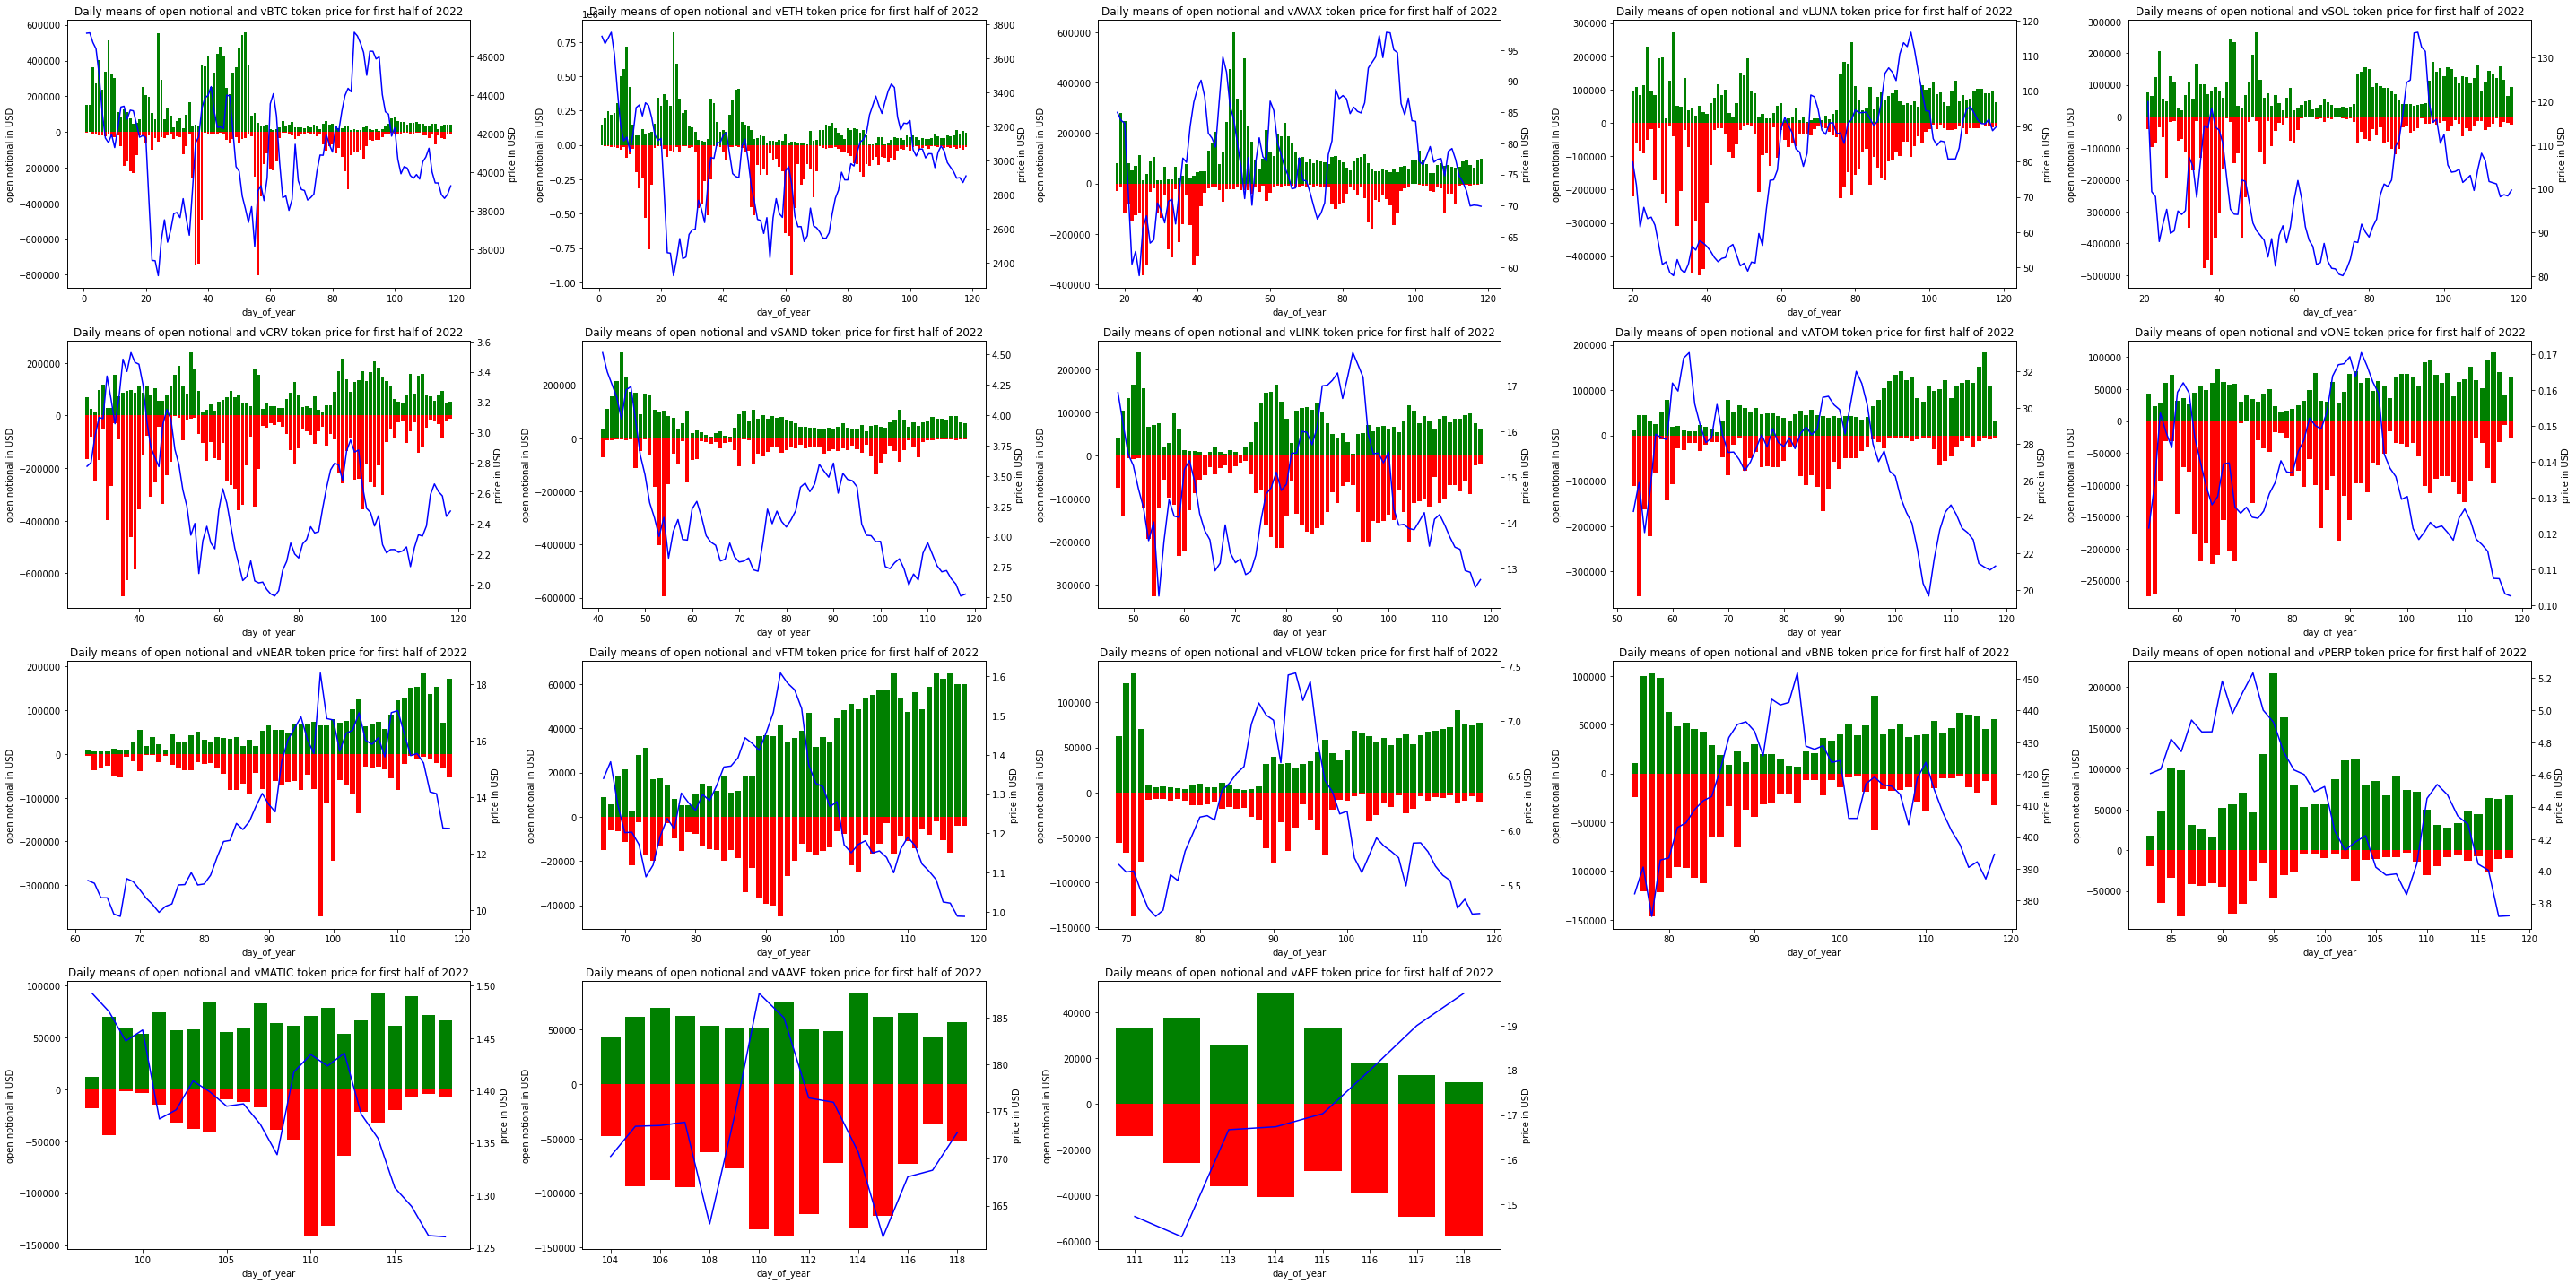

In [120]:
fig = plt.figure(figsize=(40, 20))
index = 1
for pool in position_changes_df["pool_name"].unique():
    pool_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    daily_positive_pool_changes_df = pool_changes_df[pool_changes_df["open_notional"] >= 0][
                                    ["day_of_year", "open_notional", "swapped_price"]].groupby("day_of_year").mean()
    daily_negative_pool_changes_df = pool_changes_df[pool_changes_df["open_notional"] < 0][
                                    ["day_of_year", "open_notional", "swapped_price"]].groupby("day_of_year").mean()
    ax = fig.add_subplot(4, 5, index)
    ax2 = ax.twinx()
    ax.bar(daily_positive_pool_changes_df[daily_positive_pool_changes_df.index < 200].index,
           daily_positive_pool_changes_df[daily_positive_pool_changes_df.index < 200]["open_notional"],
           color='g', label='positive open notional')
    ax.bar(daily_negative_pool_changes_df[daily_negative_pool_changes_df.index < 200].index,
           daily_negative_pool_changes_df[daily_negative_pool_changes_df.index < 200]["open_notional"],
           color='r', label='negative open notional')
    ax2.plot(daily_positive_pool_changes_df[daily_positive_pool_changes_df.index < 200].index,
             daily_positive_pool_changes_df[daily_positive_pool_changes_df.index < 200]["swapped_price"],
             color="b", label=pool + ' token price')
    ax.set_xlabel("day_of_year")
    ax.set_ylabel("open notional in USD")
    ax2.set_ylabel("price in USD")
    ax.set_title("Daily means of open notional and " + pool + " token price for first half of 2022")
    index += 1
    
fig.tight_layout()
plt.show()

In [121]:
position_changes_df["fee"].sum()

7769810.491511692

# Creating for every pool open notional, exchanged position size in respective token to collected fee, exchanged position notional

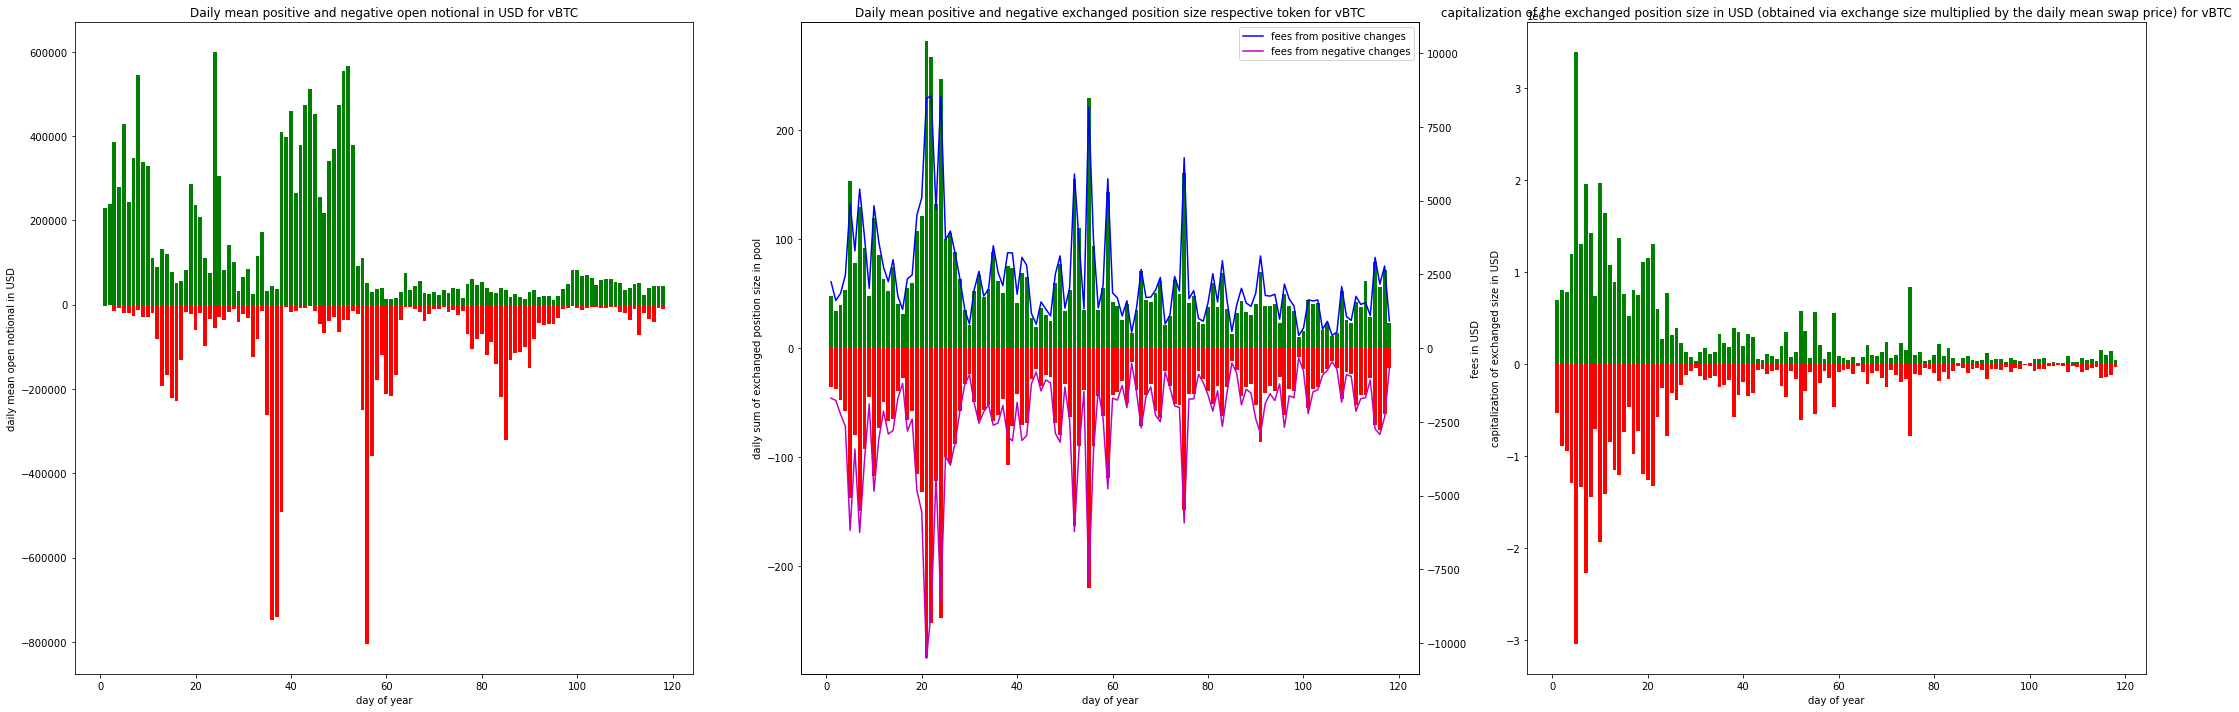

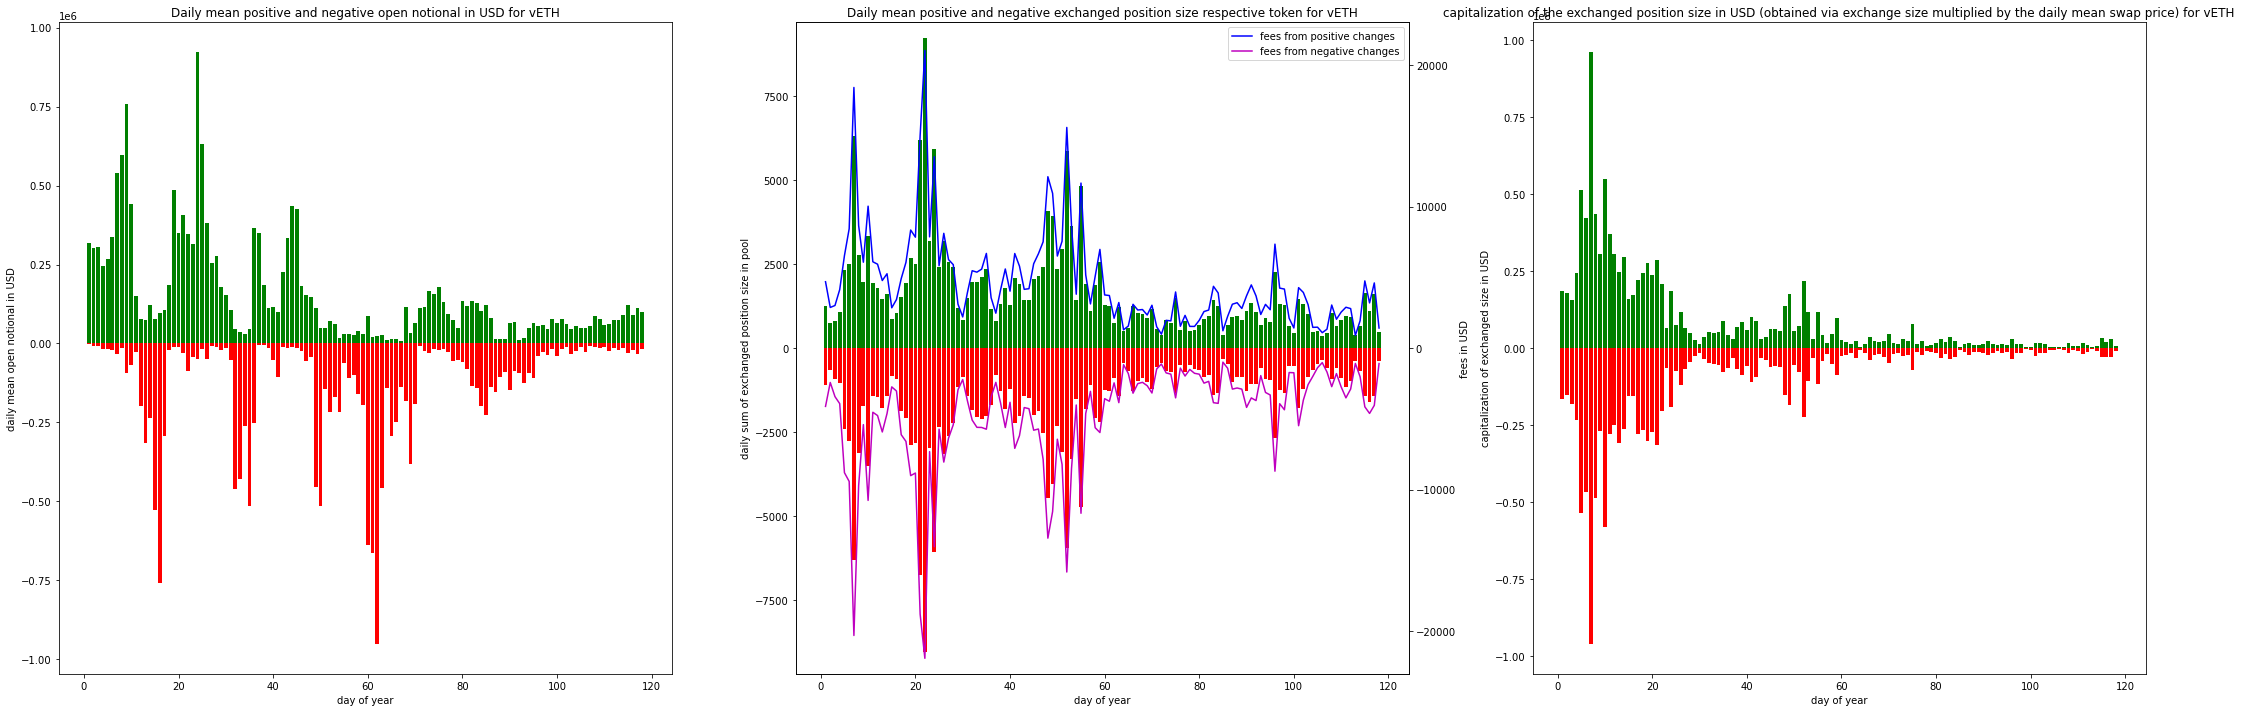

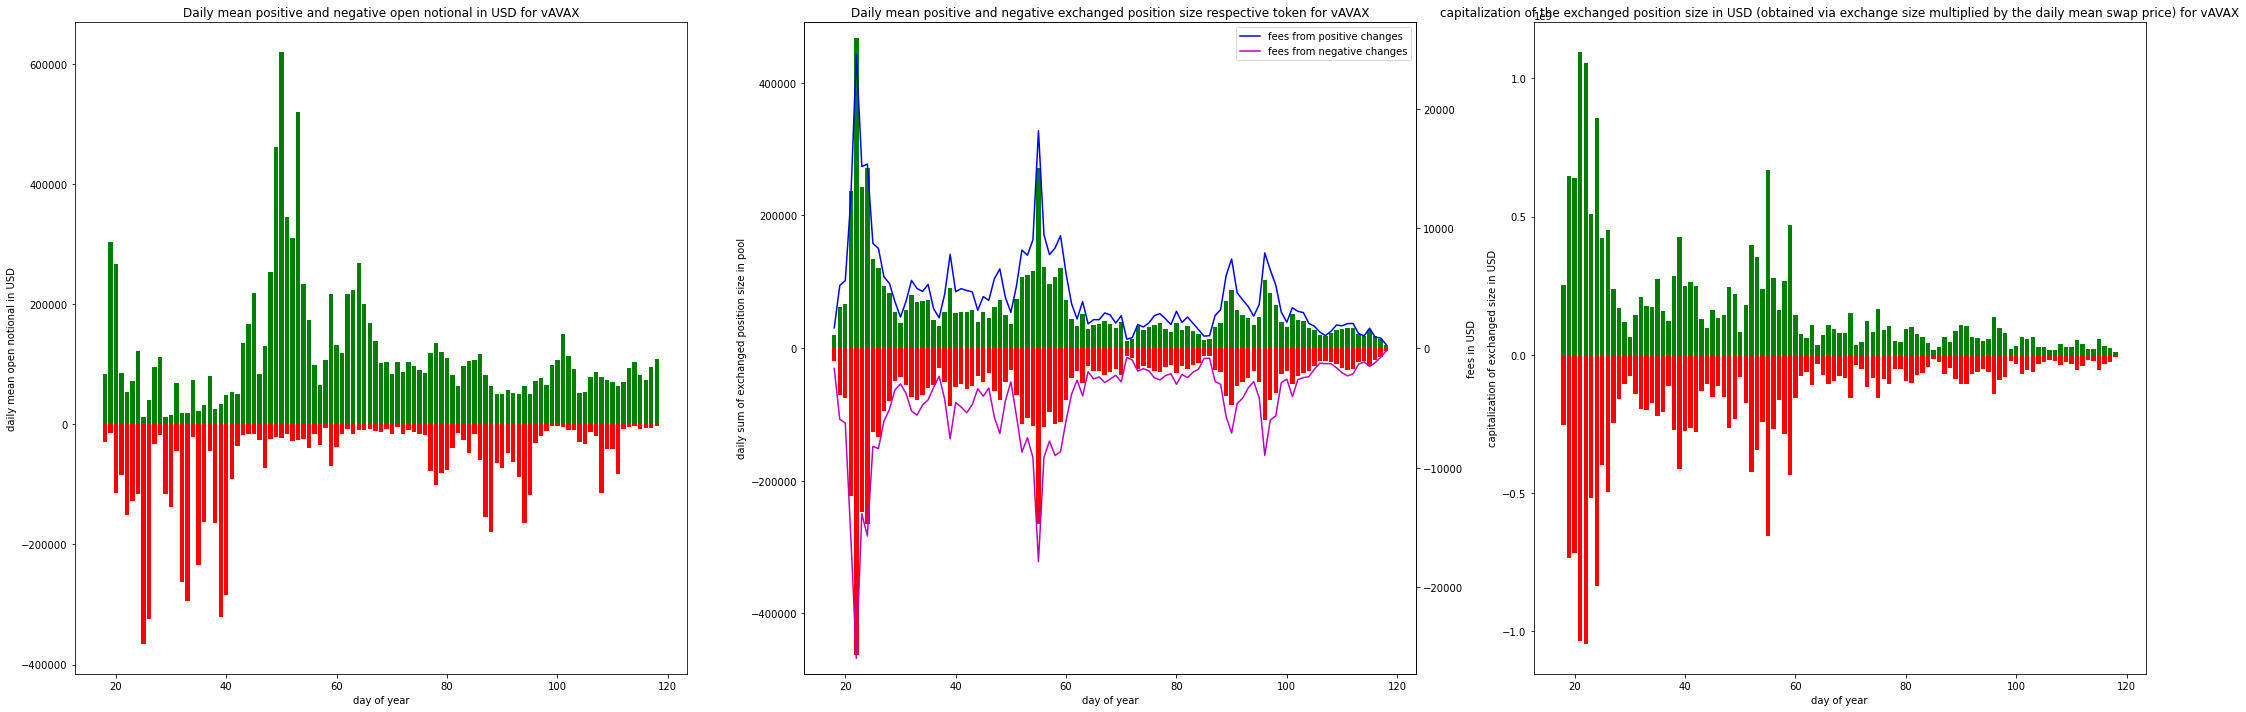

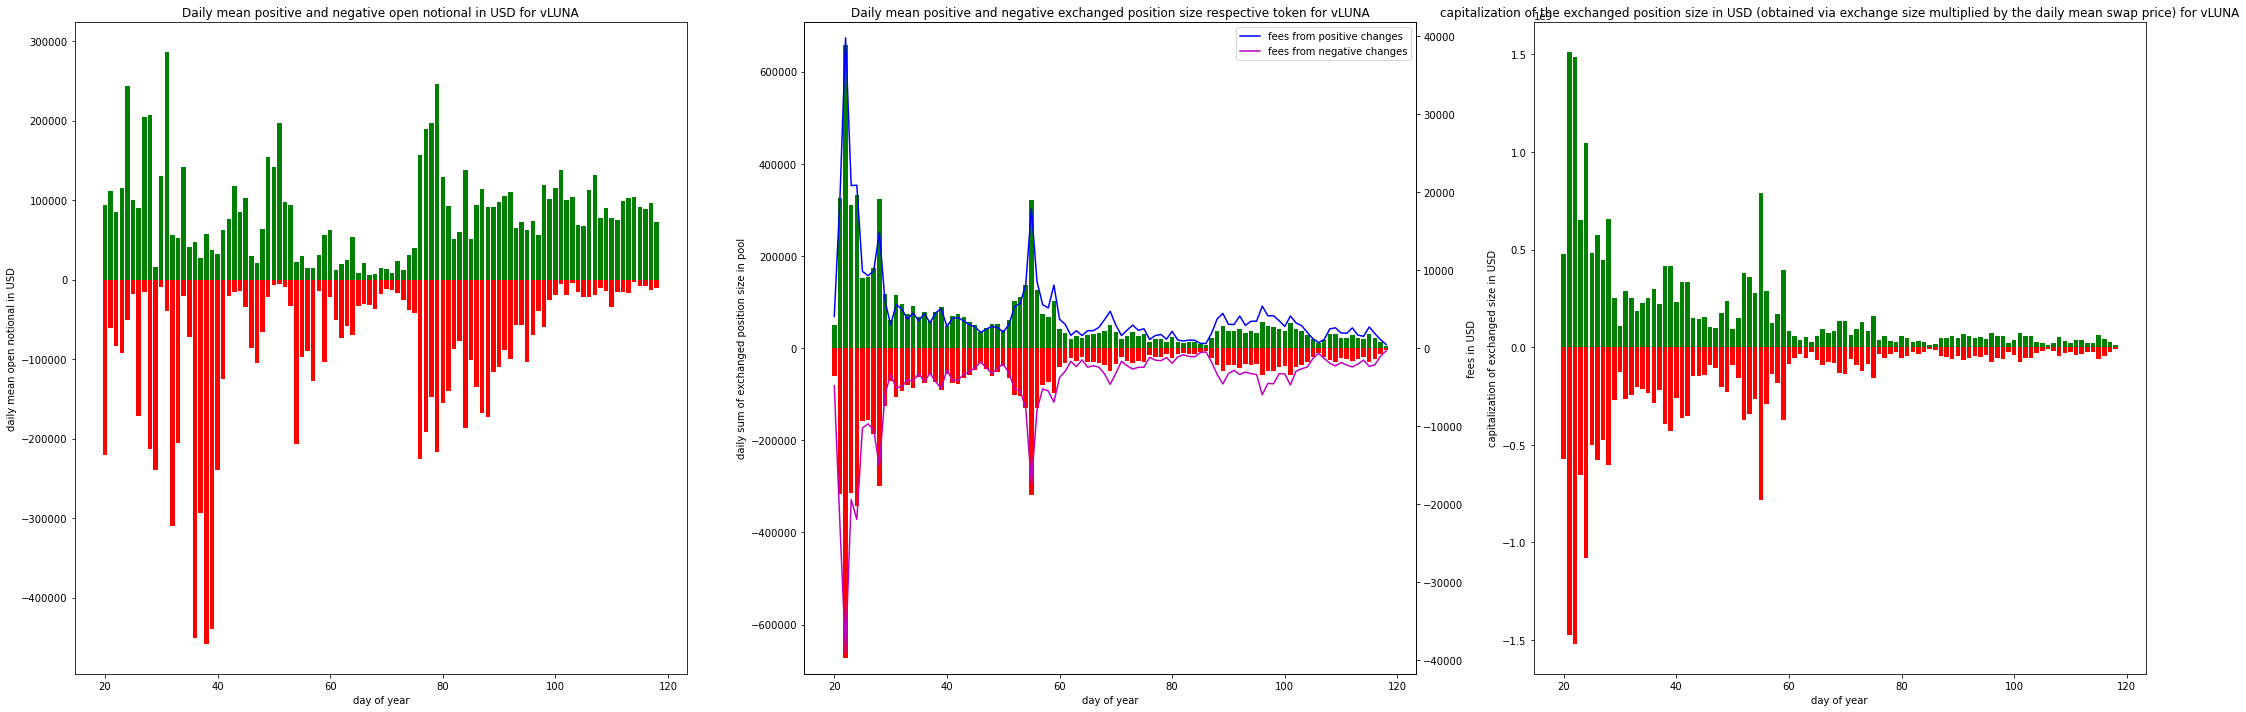

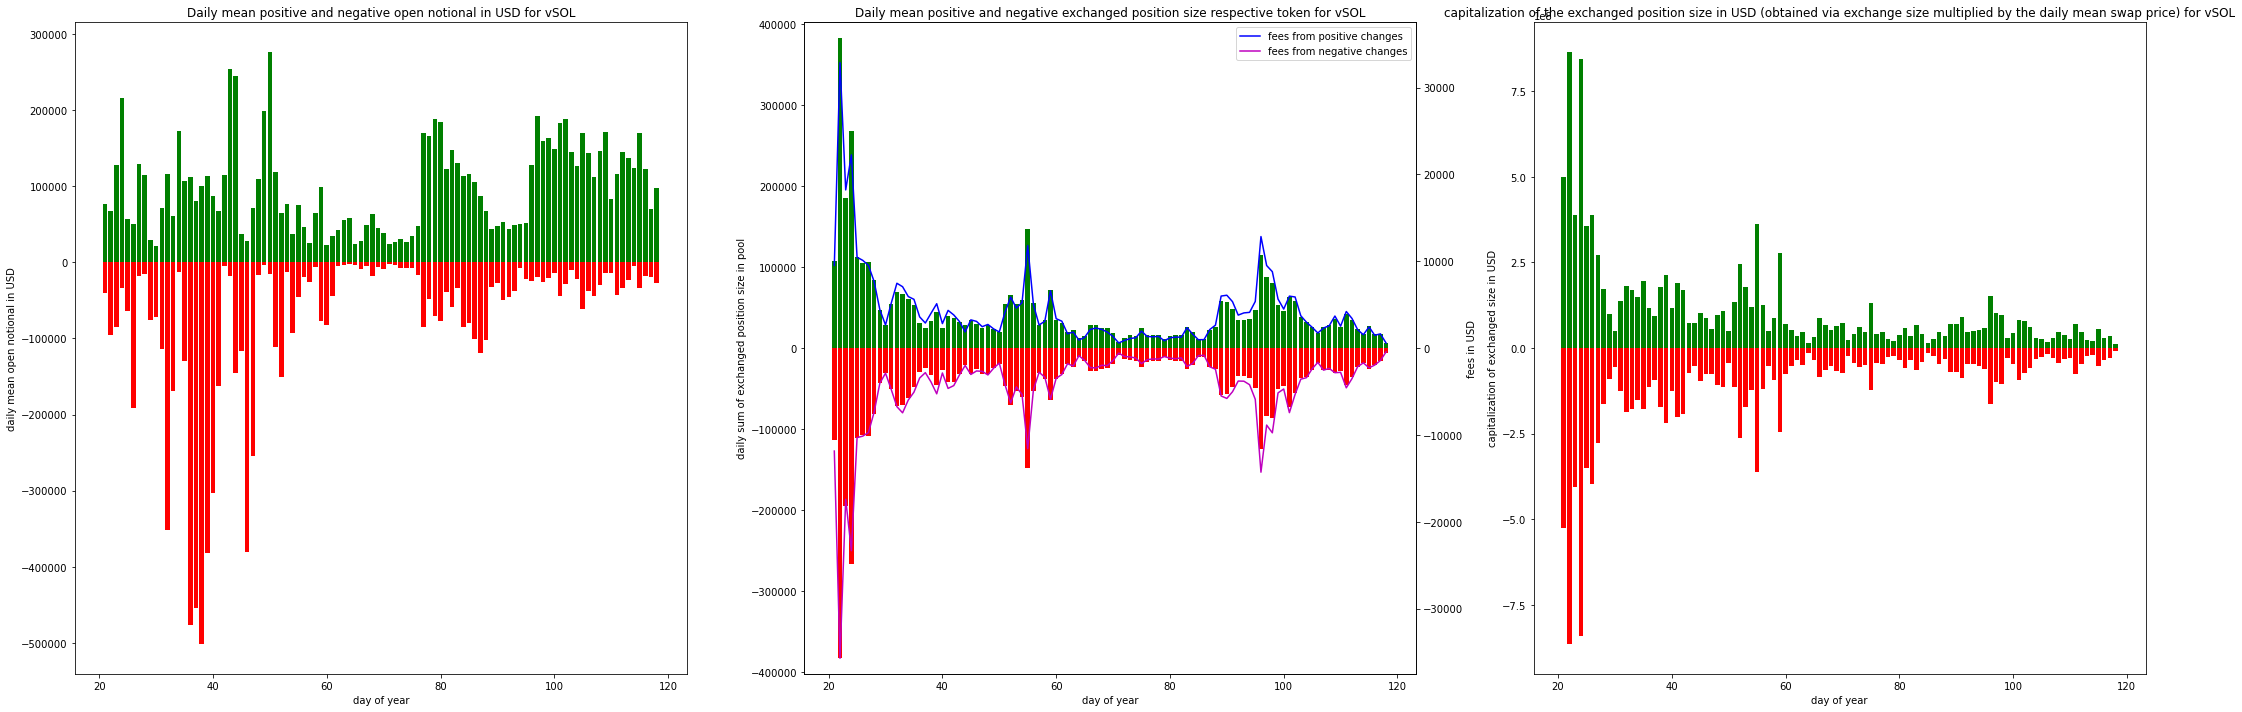

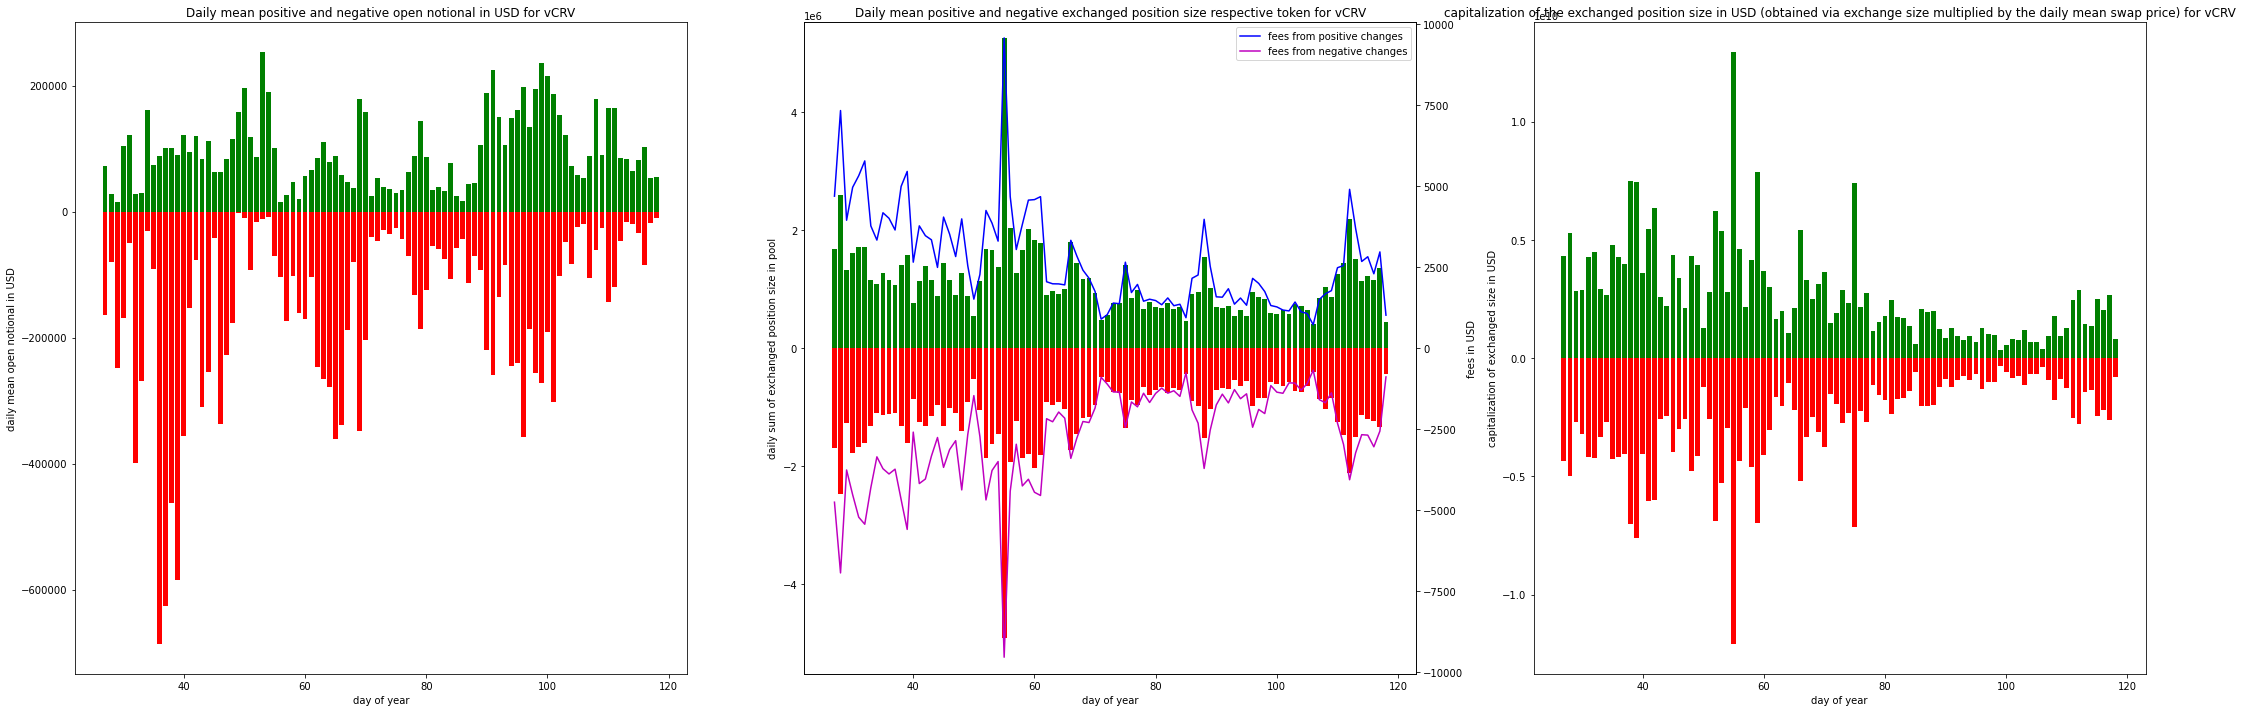

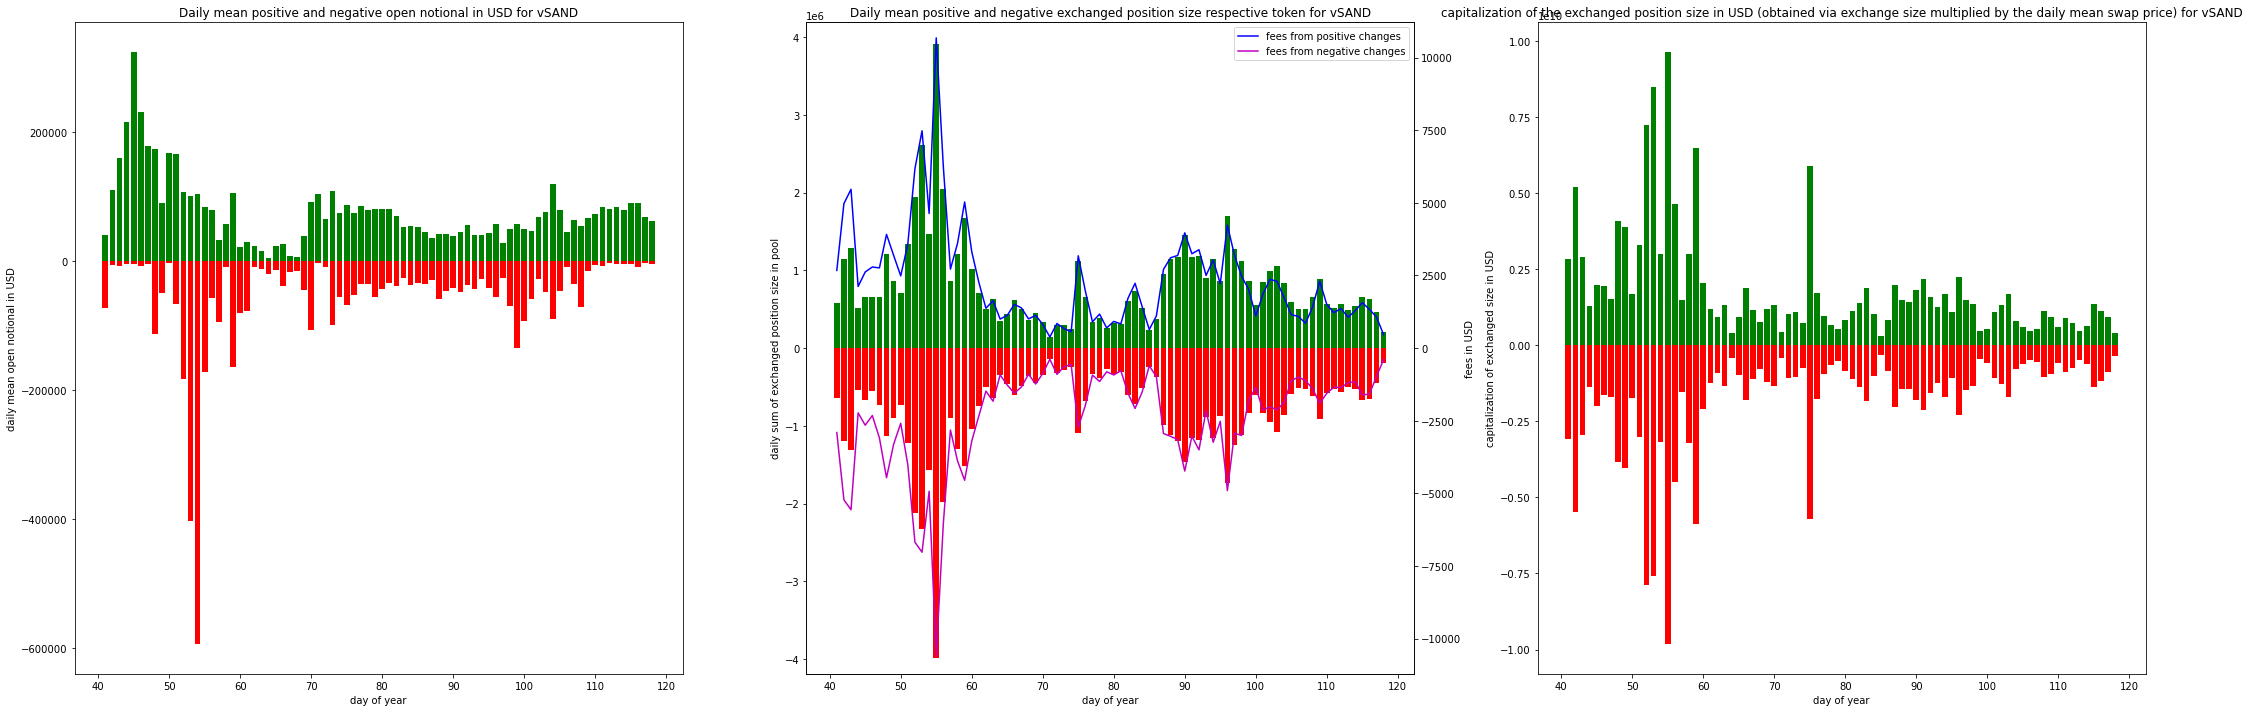

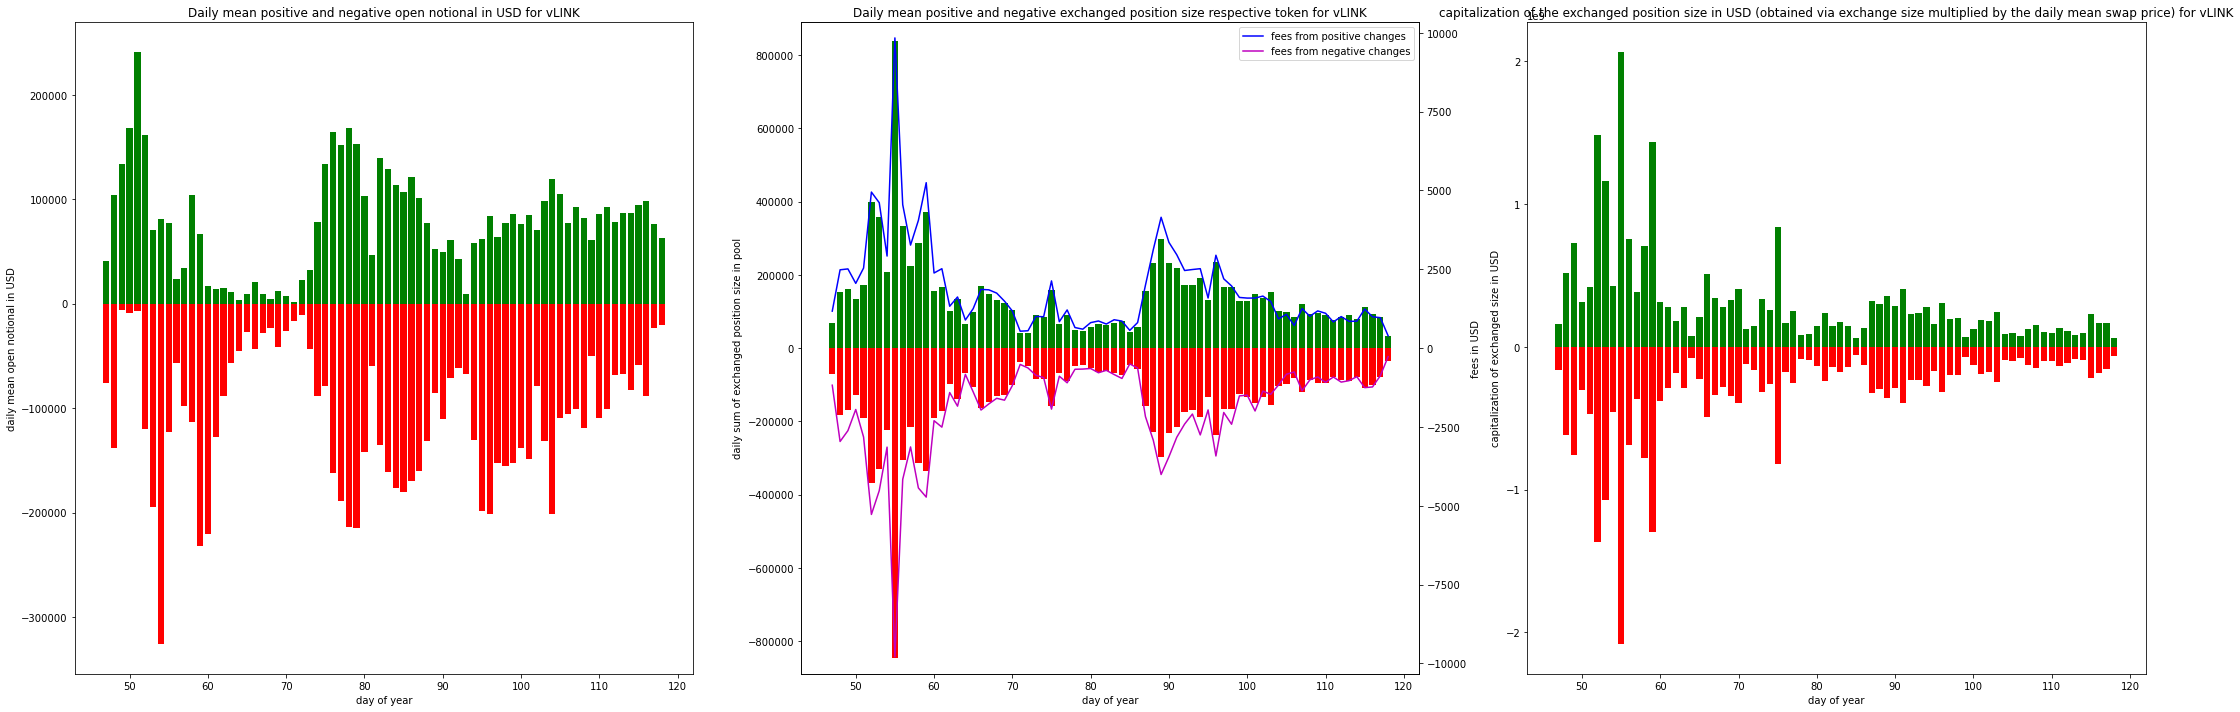

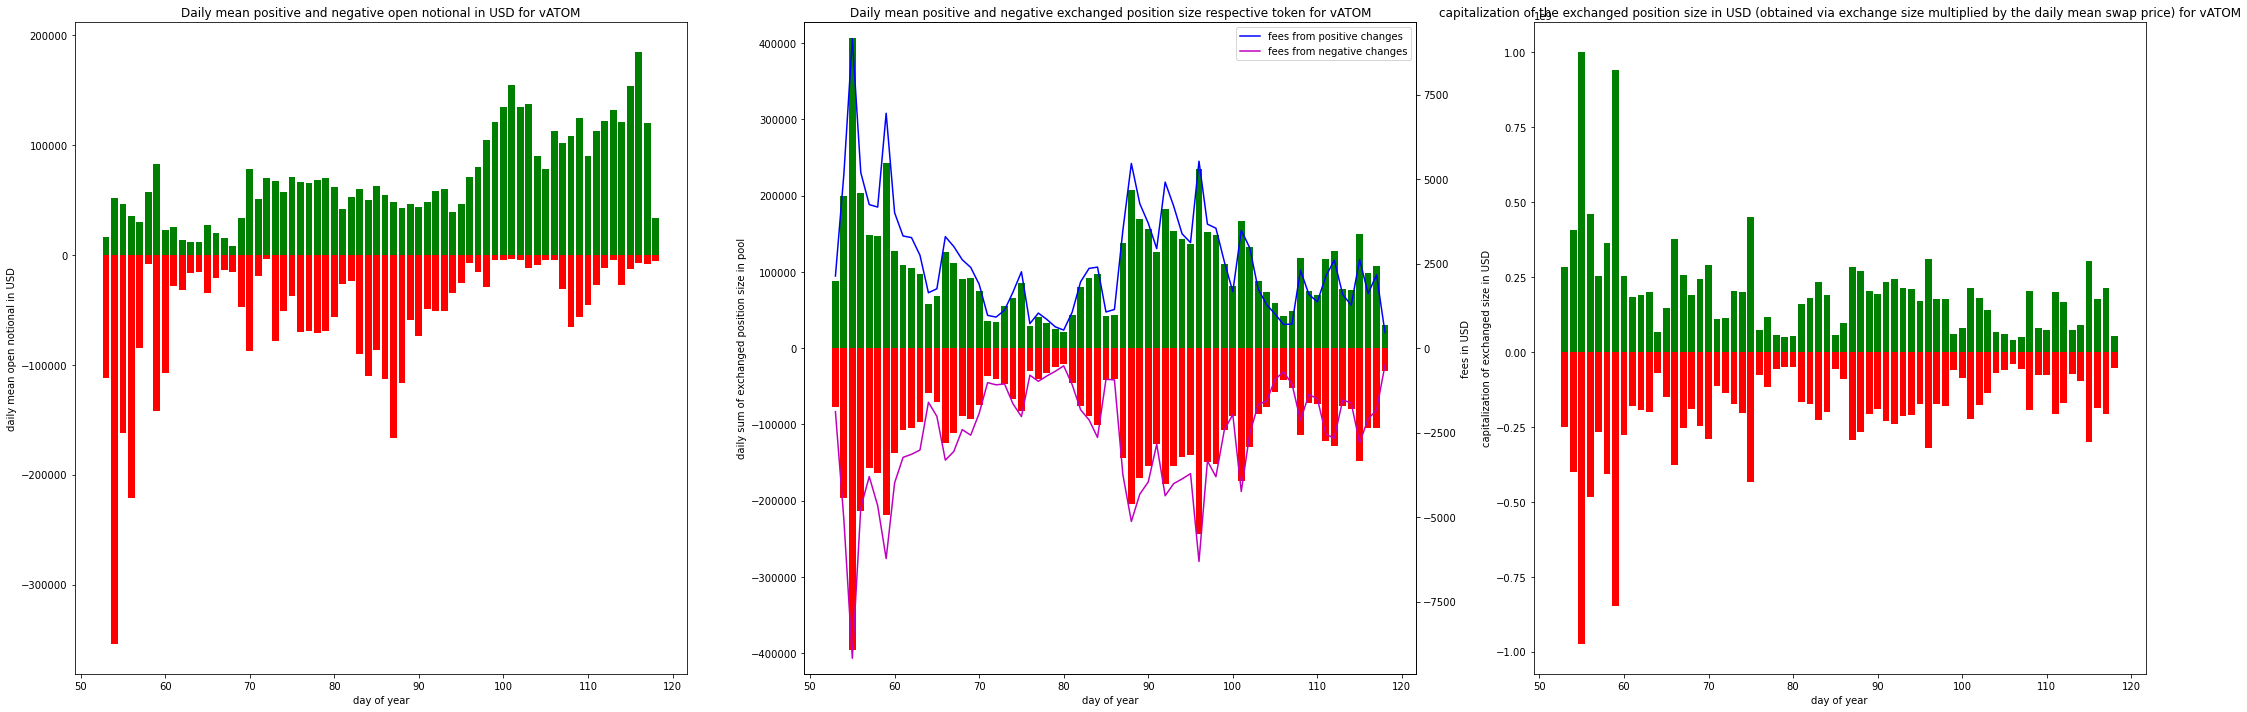

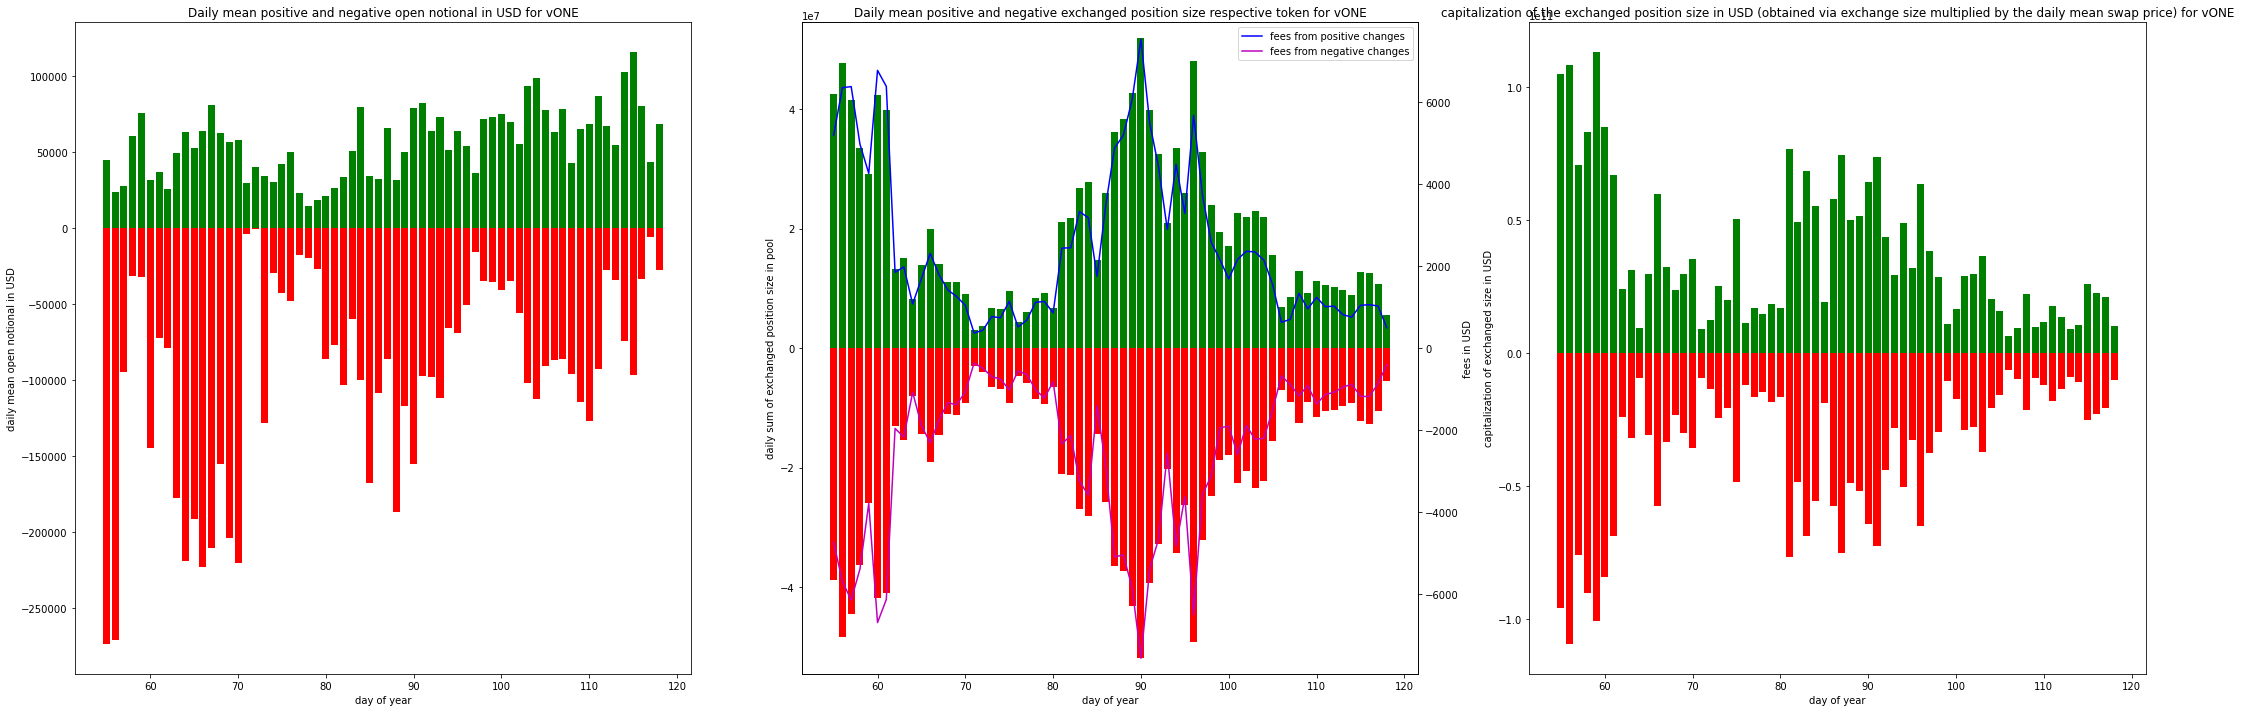

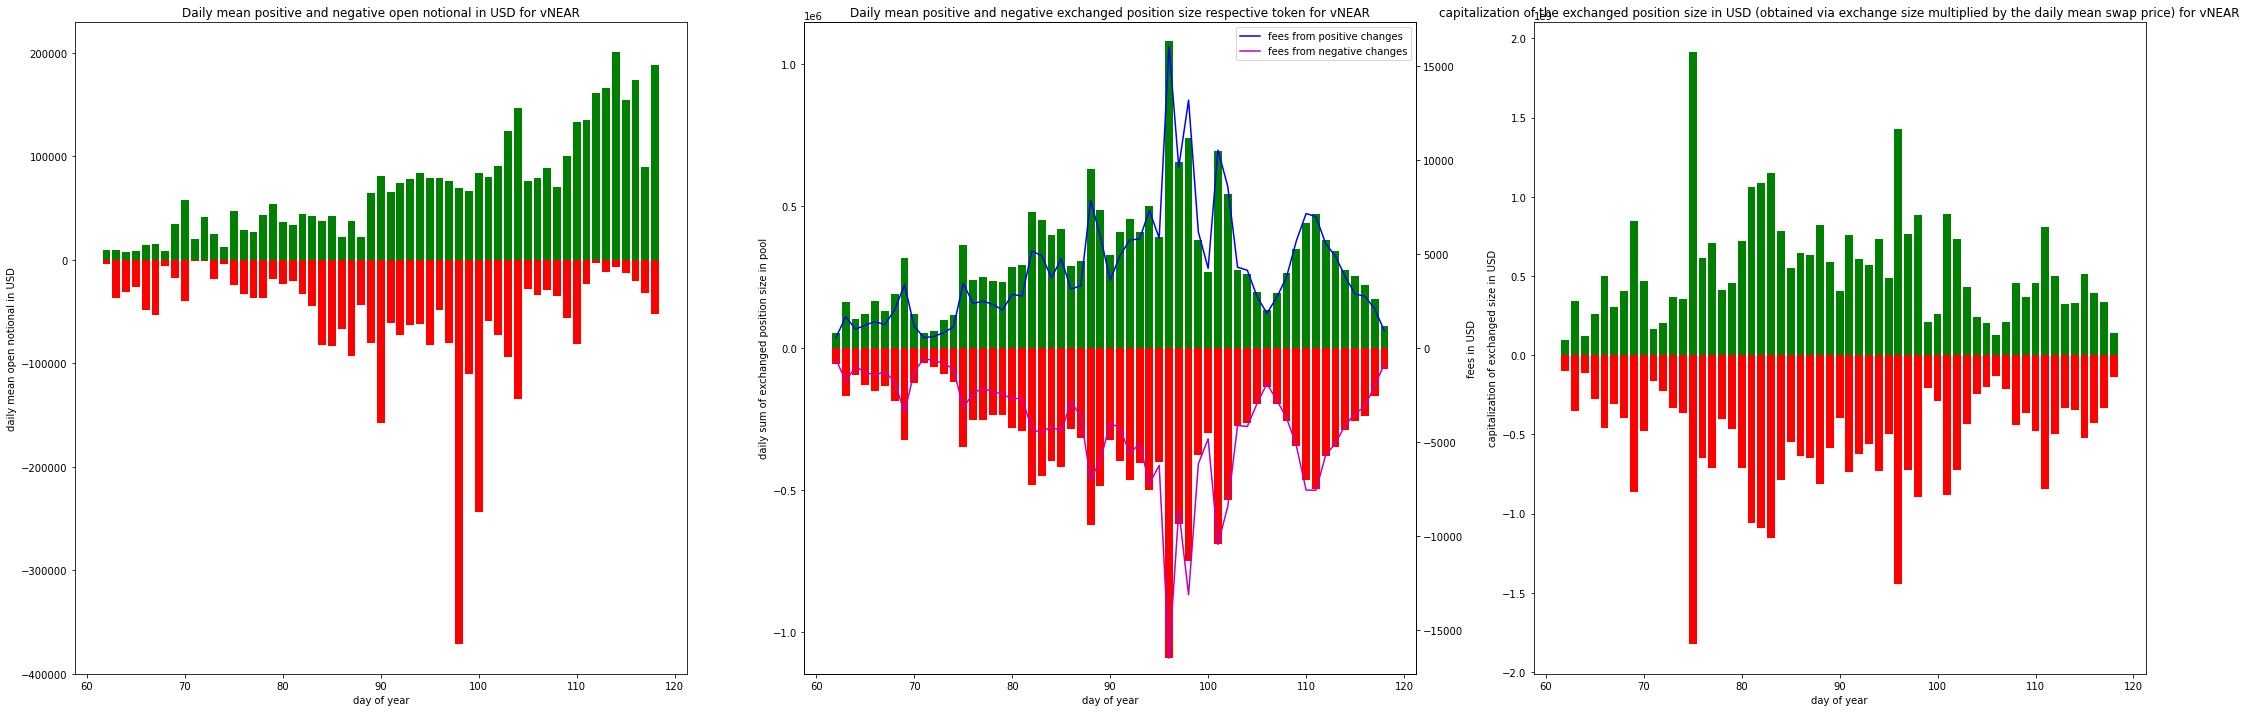

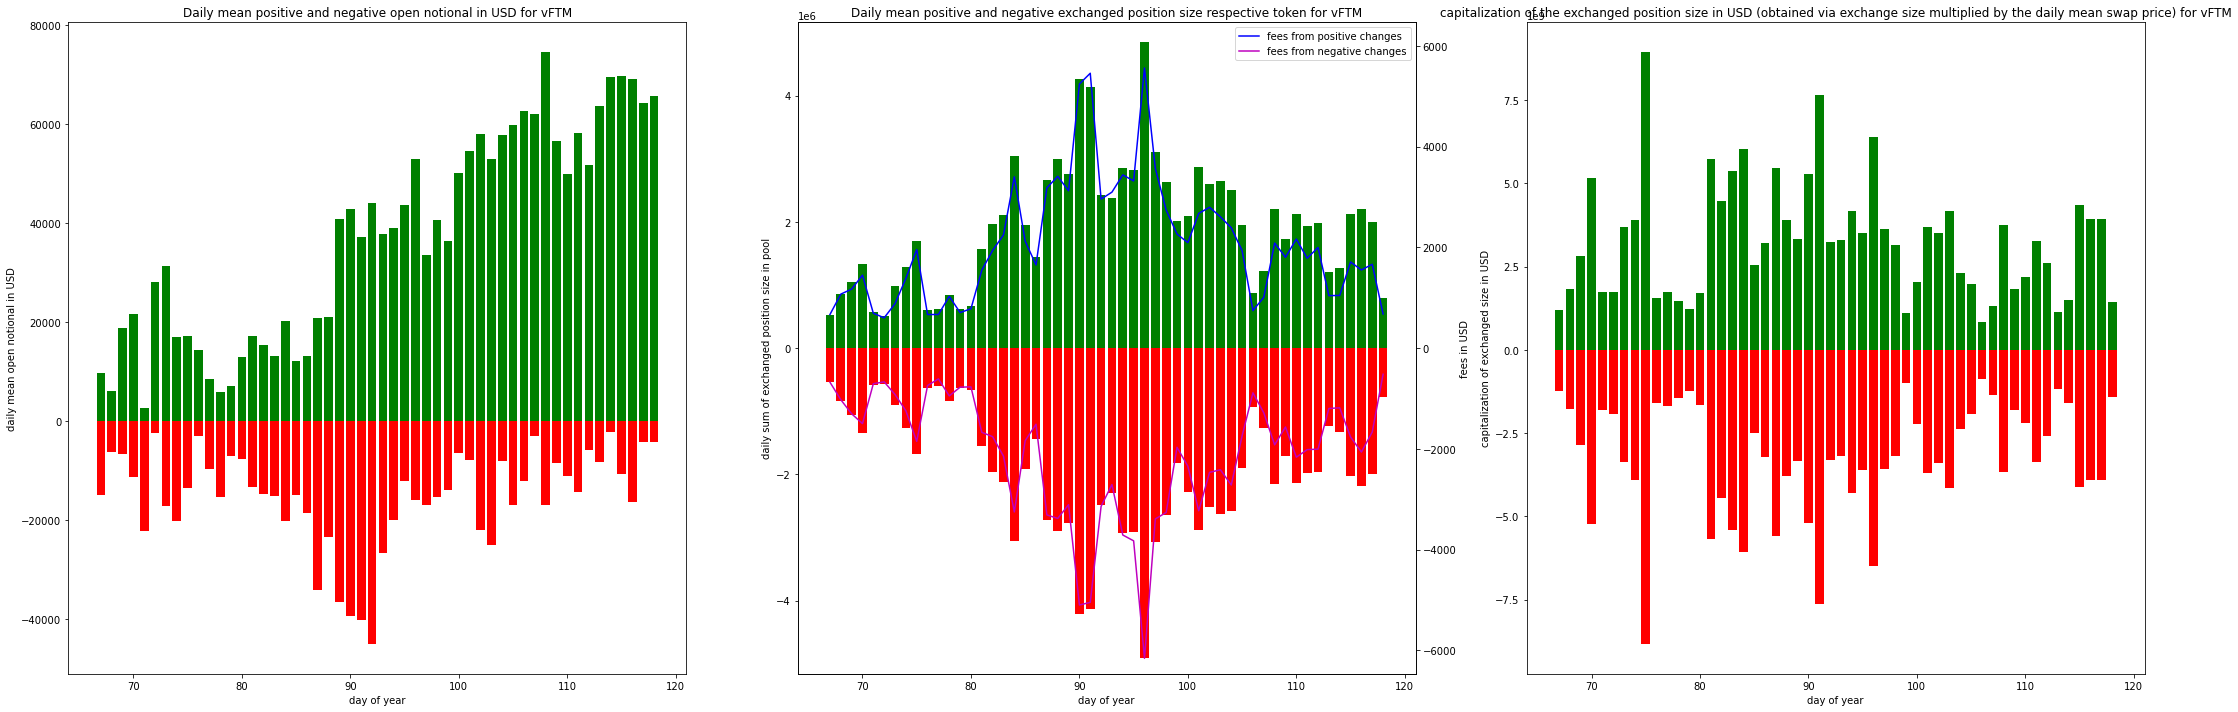

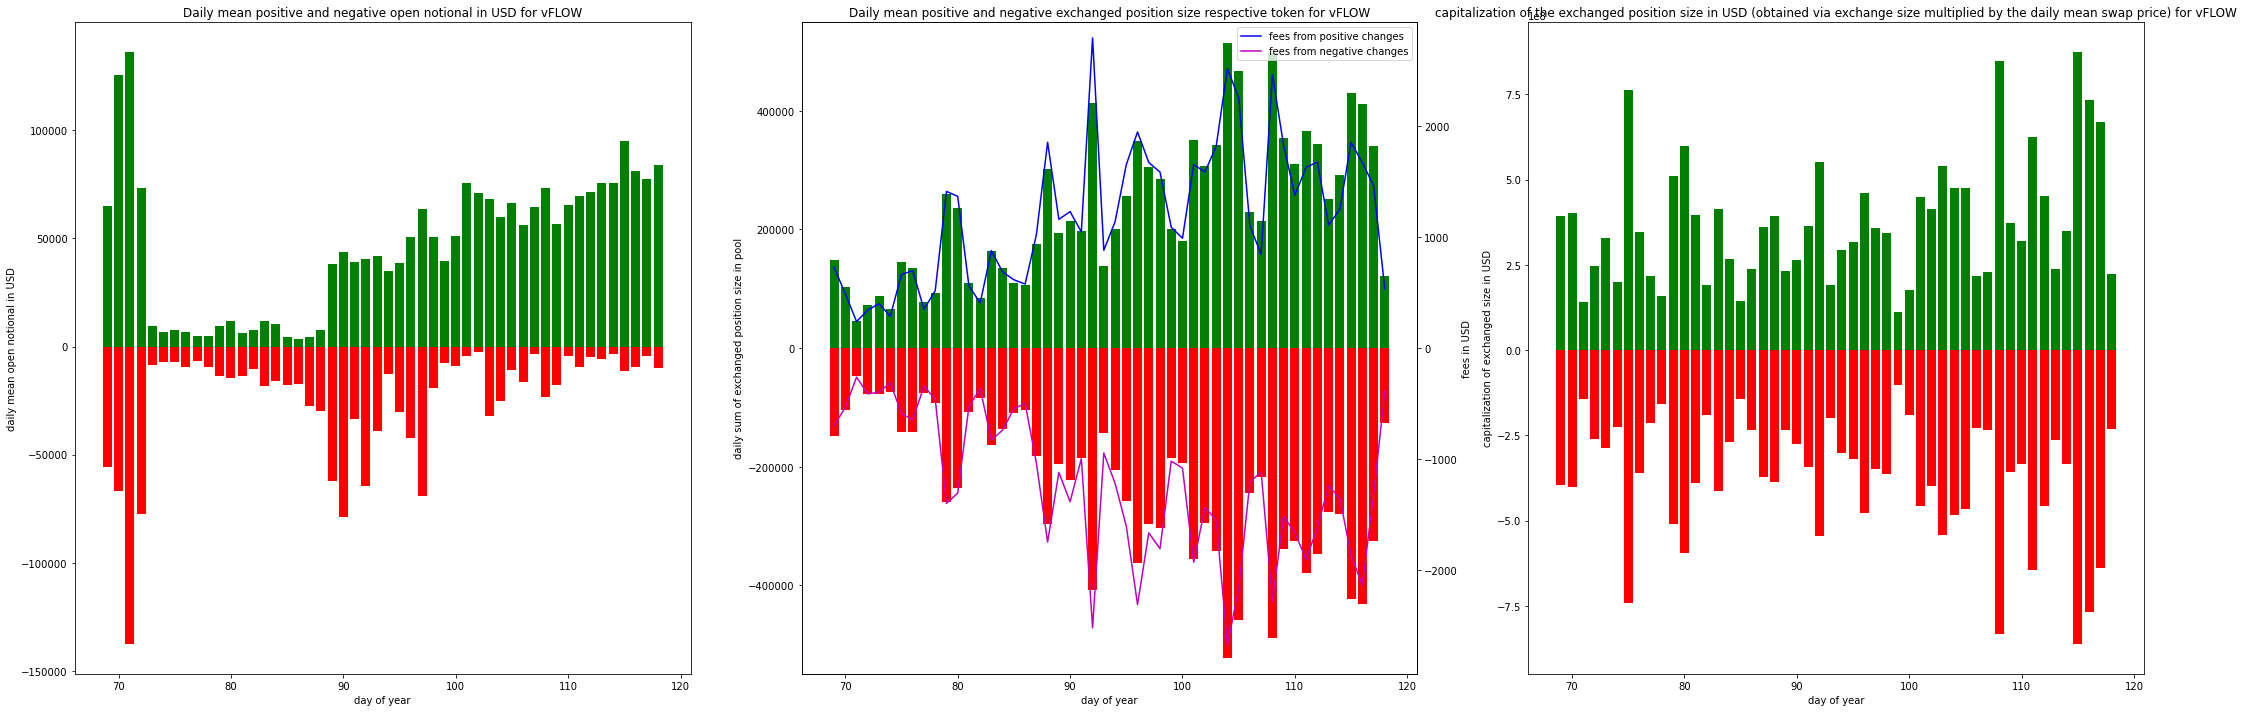

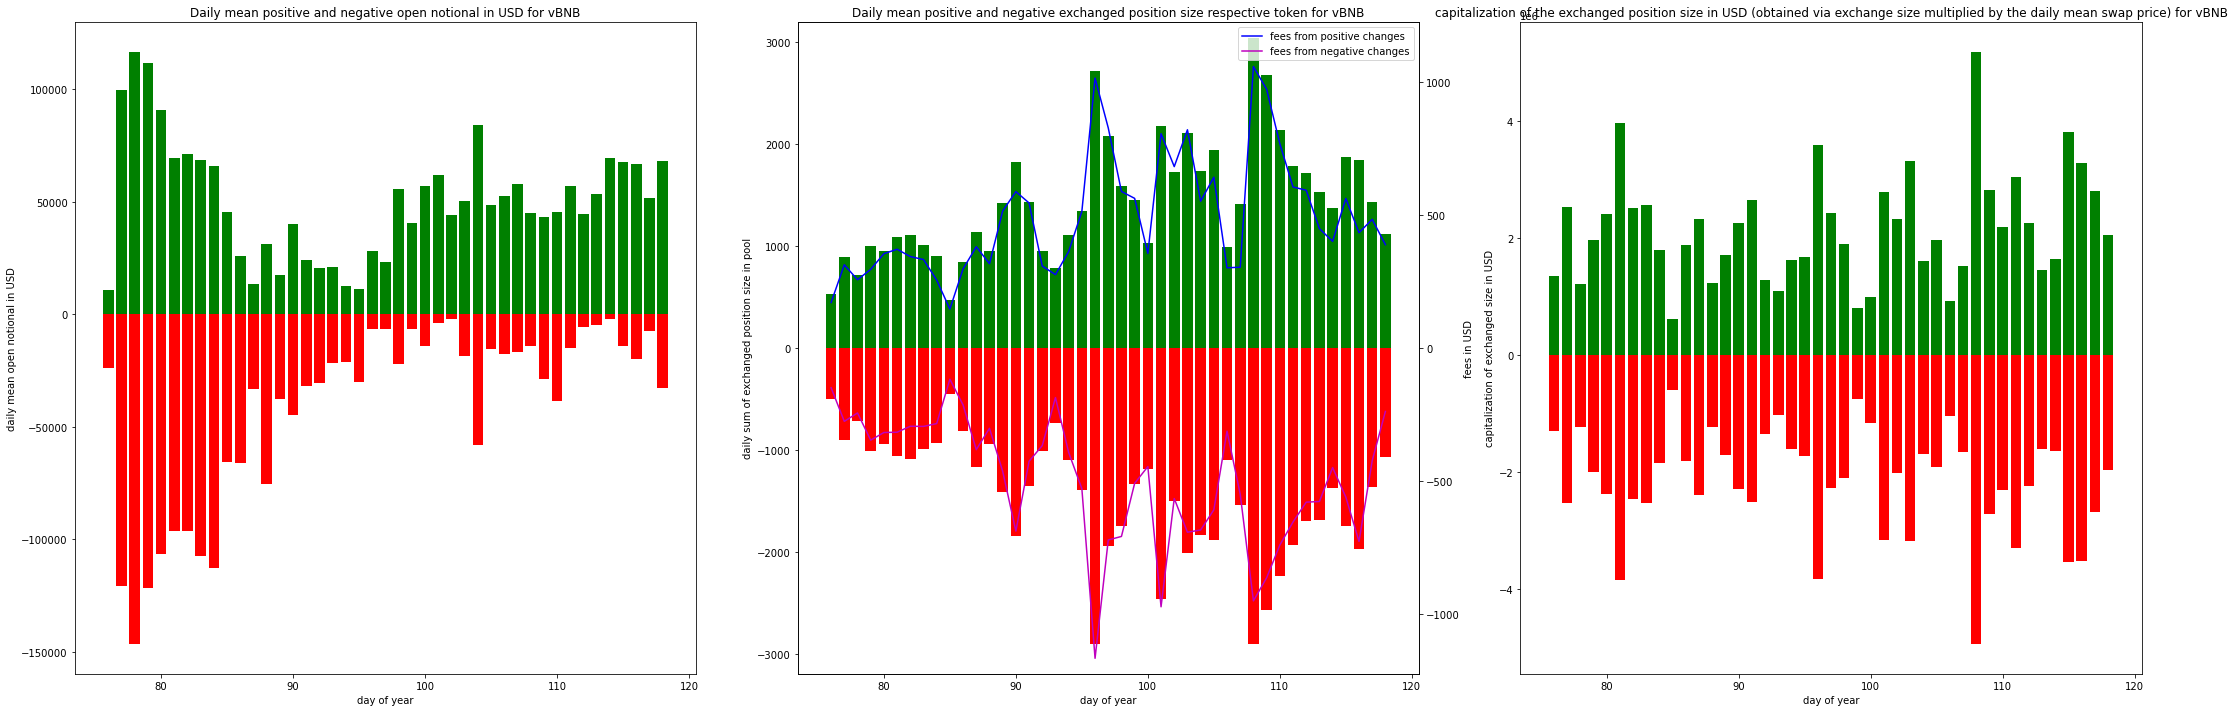

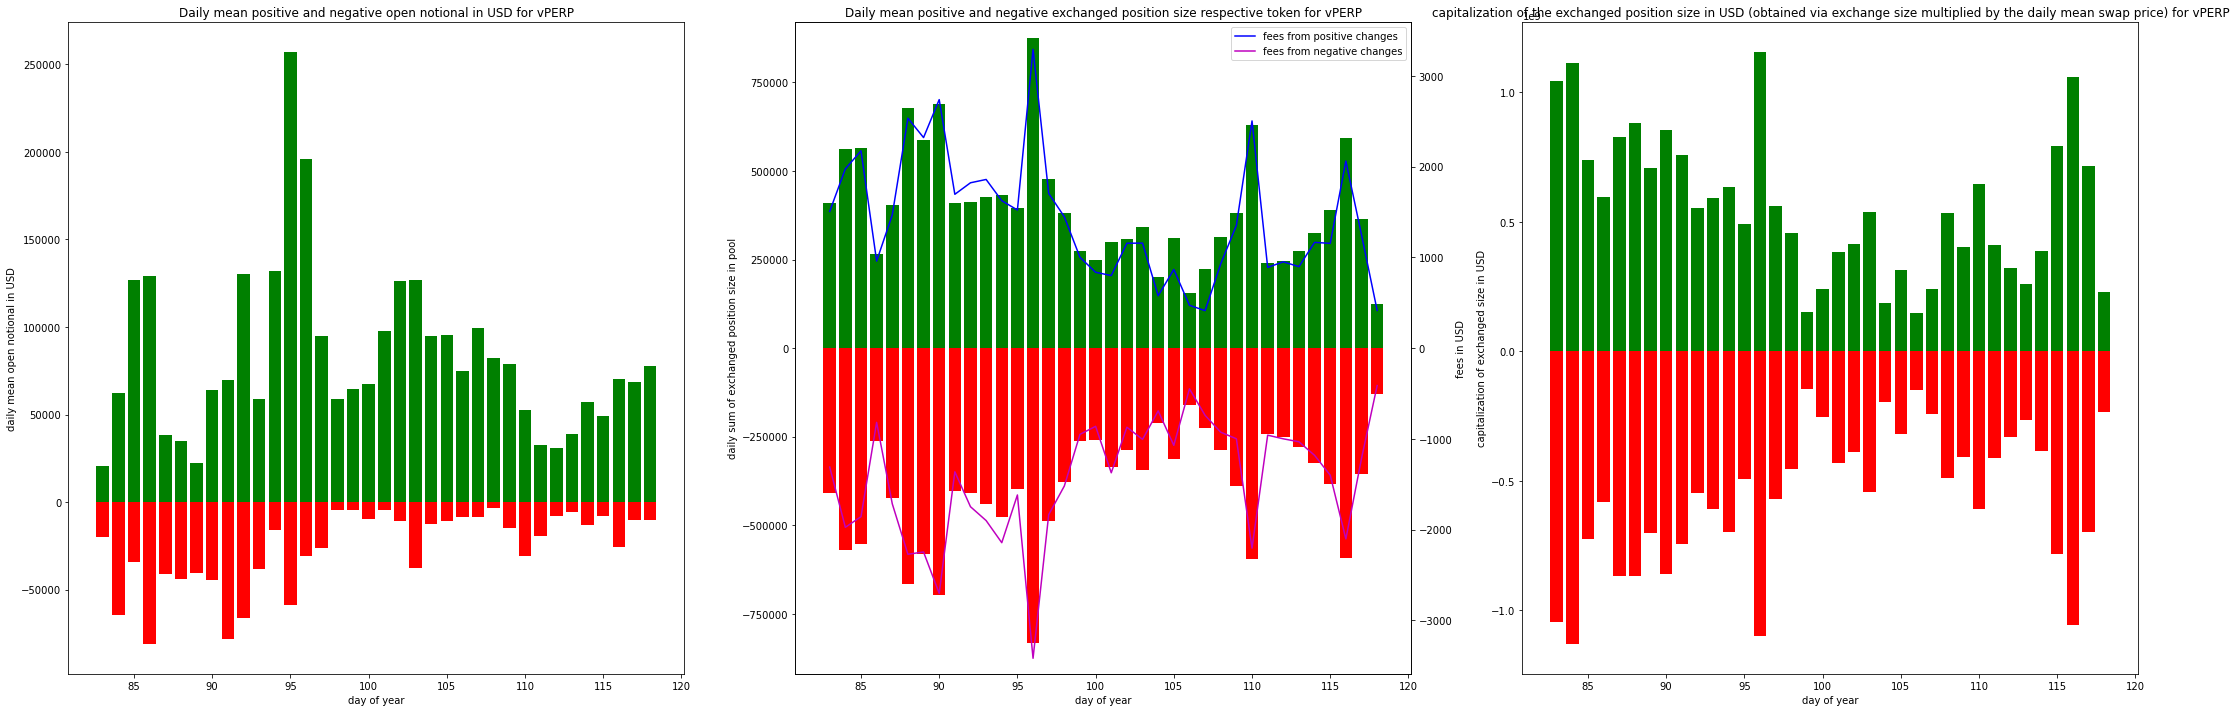

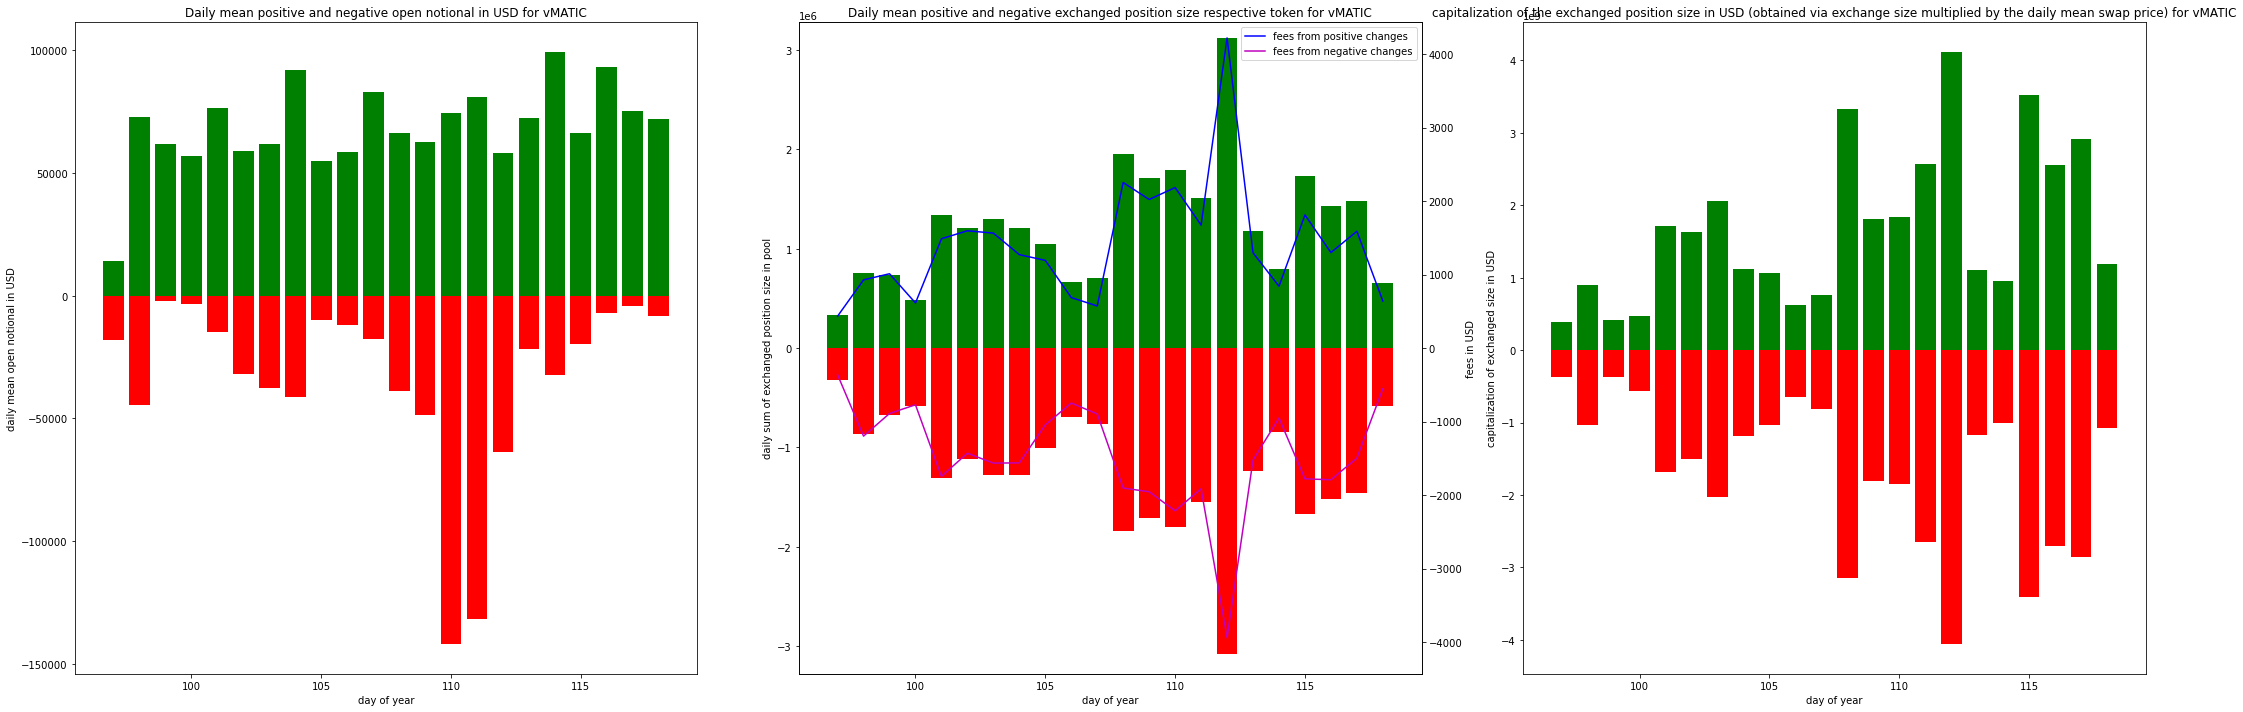

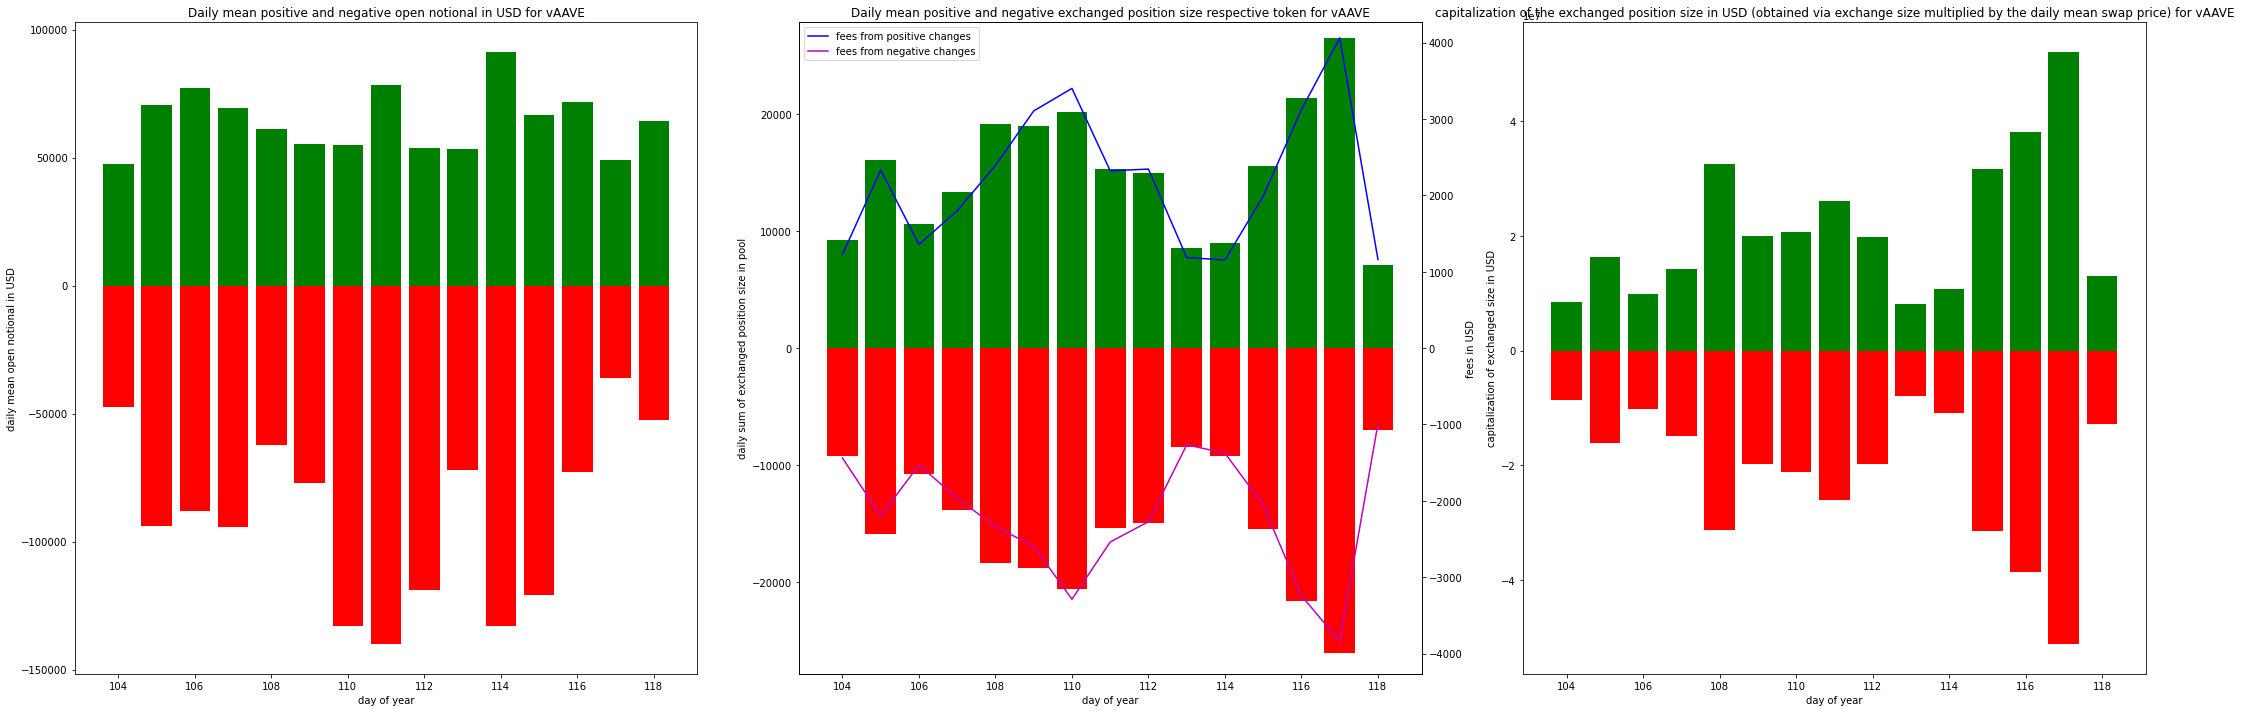

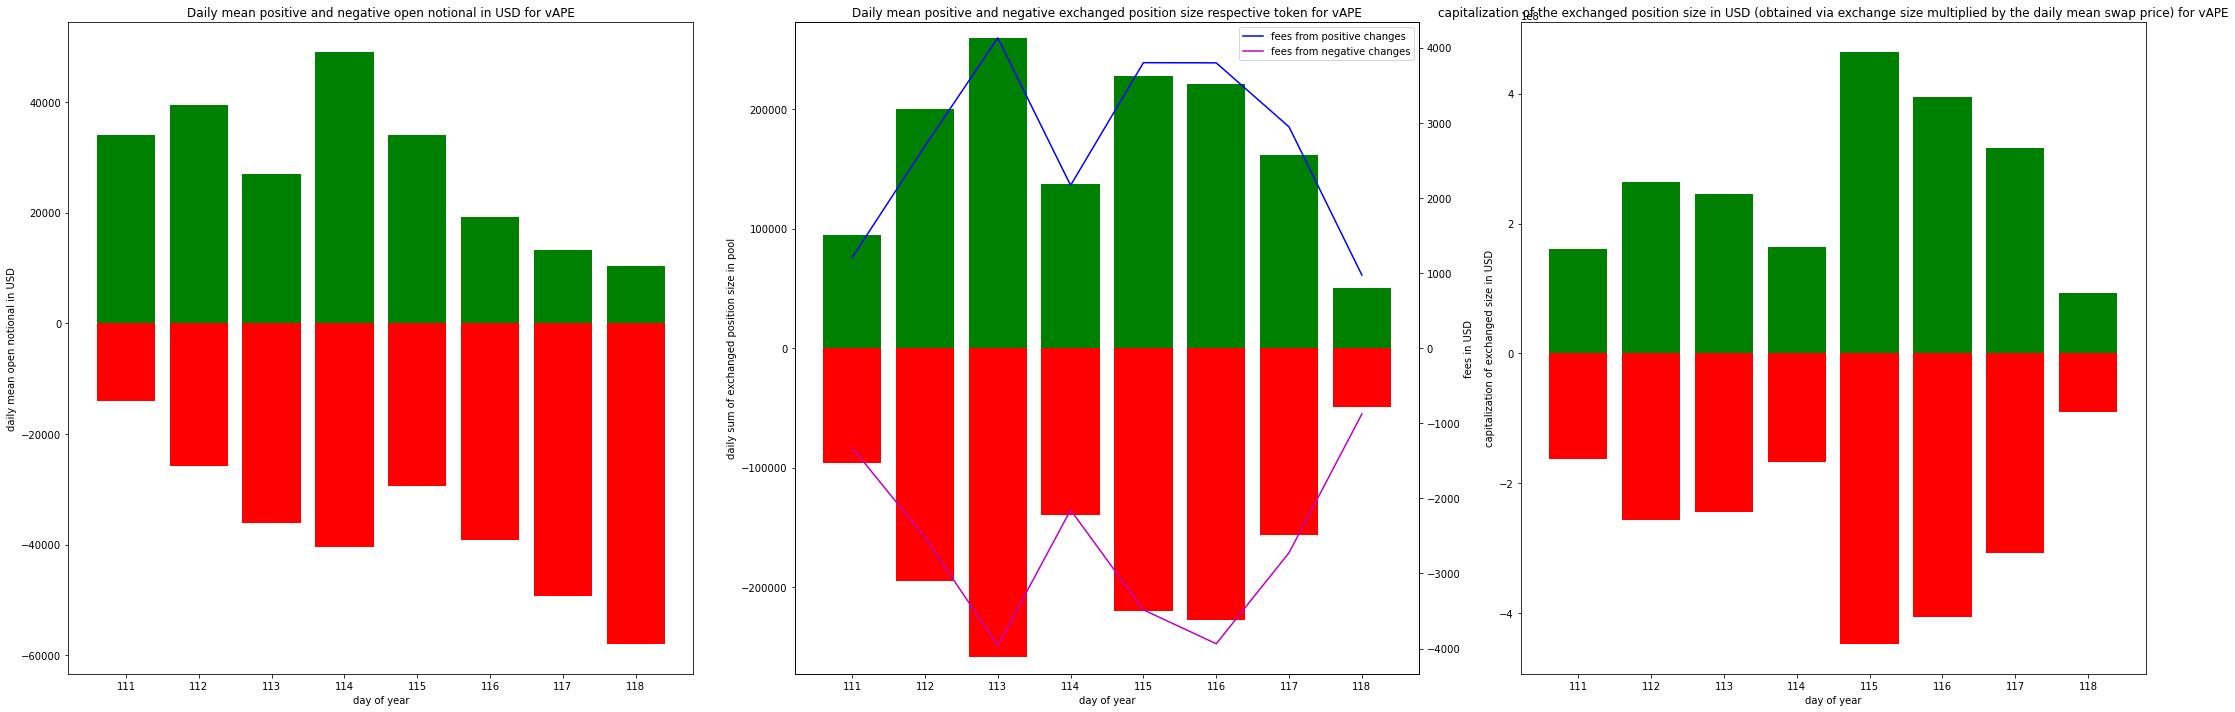

In [122]:
for pool in position_changes_df["pool_name"].unique():
       pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
       token_daily_mean_price_df = pool_position_changes_df[["day_of_year", "swapped_price"]].groupby("day_of_year").mean()

       pool_positive_open_notional_daily_df = pool_position_changes_df[pool_position_changes_df["open_notional"] > 0
                                                                      ][["day_of_year", "open_notional"]].groupby("day_of_year").mean()
       pool_negative_open_notional_daily_df = pool_position_changes_df[pool_position_changes_df["open_notional"] < 0
                                                                      ][["day_of_year", "open_notional"]].groupby("day_of_year").mean()

       pool_positive_exchanged_position_size_daily_df = pool_position_changes_df[pool_position_changes_df["exchanged_position_size"] > 0
                                                                                    ][["day_of_year", "exchanged_position_size", "fee"]
                                                                                    ].groupby("day_of_year").sum()
       pool_positive_exchanged_position_size_daily_df["exchanged_position_notional"] = (
       pool_positive_exchanged_position_size_daily_df["exchanged_position_size"] * token_daily_mean_price_df["swapped_price"]
       )

       pool_negative_exchanged_position_size_daily_df = pool_position_changes_df[pool_position_changes_df["exchanged_position_size"] < 0
                                                                                    ][["day_of_year", "exchanged_position_size", "fee"]
                                                                                    ].groupby("day_of_year").sum()
       pool_negative_exchanged_position_size_daily_df["exchanged_position_notional"] = (
       pool_negative_exchanged_position_size_daily_df["exchanged_position_size"] * token_daily_mean_price_df["swapped_price"]
       )
    
       fig = plt.figure(figsize=(30, 10))

       ax = fig.add_subplot(1, 3, 1)
       ax.bar(pool_positive_open_notional_daily_df[pool_positive_open_notional_daily_df.index < 200].index,
       pool_positive_open_notional_daily_df[pool_positive_open_notional_daily_df.index < 200]["open_notional"],
              color='g')
       ax.bar(pool_negative_open_notional_daily_df[pool_negative_open_notional_daily_df.index < 200].index,
              pool_negative_open_notional_daily_df[pool_negative_open_notional_daily_df.index < 200]["open_notional"],
              color='r')
       ax.set_xlabel("day of year")
       ax.set_ylabel("daily mean open notional in USD")
       ax.set_title("Daily mean positive and negative open notional in USD for " + pool)

       ax = fig.add_subplot(1, 3, 2)
       ax2 = ax.twinx()
       ax.bar(pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200].index,
              pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200]["exchanged_position_size"],
              color='g', label='positive position changes')
       ax2.plot(pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200].index,
              pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200]["fee"],
              color='b', label='fees from positive changes')
       ax.bar(pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200].index,
              pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200]["exchanged_position_size"],
              color='r', label='negative position changes')
       ax2.plot(pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200].index,
              -pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200]["fee"],
              color='m', label='fees from negative changes')
       ax.set_xlabel("day of year")
       ax.set_ylabel("daily sum of exchanged position size in pool")
       ax2.set_ylabel("fees in USD")
       ax2.legend()
       ax.set_title("Daily mean positive and negative exchanged position size respective token for " + pool)
       
       max_positive_exchanged_size = pool_positive_exchanged_position_size_daily_df["exchanged_position_size"].max()
       max_negative_exchanged_size = abs(pool_negative_exchanged_position_size_daily_df["exchanged_position_size"].min())
       max_abs_exchanged_size = (max_positive_exchanged_size if max_positive_exchanged_size > max_negative_exchanged_size 
                                 else max_negative_exchanged_size)
       max_positive_fee = pool_positive_exchanged_position_size_daily_df["fee"].max()
       max_negative_fee = pool_negative_exchanged_position_size_daily_df["fee"].max()
       max_abs_fee = max_positive_fee if max_positive_fee > max_negative_fee else max_negative_fee
       
       ax.set_ylim(-max_abs_exchanged_size * 1.05, max_abs_exchanged_size * 1.05)
       ax2.set_ylim(-max_abs_fee * 1.05, max_abs_fee * 1.05)

       pool_daily_mean_price = position_changes_df[["day_of_year", "swapped_price"]].groupby("day_of_year").mean()
       pool_positive_exchanged_position_size_daily_df["exchanged_position_notional"] = (
       pool_positive_exchanged_position_size_daily_df["exchanged_position_size"] * pool_daily_mean_price["swapped_price"]
       )
       pool_negative_exchanged_position_size_daily_df["exchanged_position_notional"] = (
       pool_negative_exchanged_position_size_daily_df["exchanged_position_size"] * pool_daily_mean_price["swapped_price"]
       )

       ax = fig.add_subplot(1, 3, 3)
       ax.bar(pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200].index,
              pool_positive_exchanged_position_size_daily_df[pool_positive_exchanged_position_size_daily_df.index < 200]["exchanged_position_notional"],
              color='g')
       ax.bar(pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200].index,
              pool_negative_exchanged_position_size_daily_df[pool_negative_exchanged_position_size_daily_df.index < 200]["exchanged_position_notional"],
              color='r')
       ax.set_xlabel("day of year")
       ax.set_ylabel("capitalization of exchanged size in USD")
       ax.set_title("capitalization of the exchanged position size in USD (obtained via exchange size multiplied by the daily mean swap price) for " + pool)

       fig.tight_layout()
       plt.show()

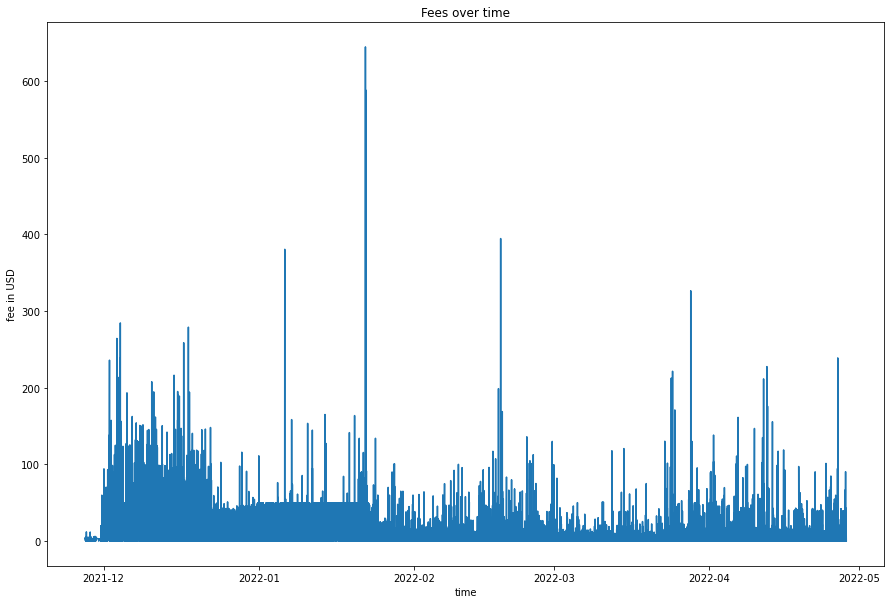

In [123]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(position_changes_df["time"], position_changes_df["fee"])
ax.set_xlabel("time")
ax.set_ylabel("fee in USD")
ax.set_title("Fees over time")
plt.show()

# Check of the fees

Verification of the fees in the position changes demonstrate values of the fee rate close to the real one and that there are demonstrated real values of the fees taken from traders. In the same time, verification of those values in the removed ```position_histories``` table demonstrated strange values with strange distribution of values. Another interesting moment is the shape of overall lineplot distribution for fees in the ```position_history``` table. Therefore, most likely there are demonstrated cumulative collected fees and this is the reason why charts are different.

This raises the problem of definitions provided by the subgraph. In the original table was mentioned that ```fee``` column represents collectable fee from trader and no mentioning of the cumulative nature of presented numbers

In [124]:
position_changes_df.fee.max()

644.735846471144

In [125]:
position_changes_df.exchanged_position_notional.max()

2146351.703325162

In [126]:
position_changes_df["fee_rate"] = (position_changes_df["fee"] * 100 / 
                                    position_changes_df["exchanged_position_notional"])

In [127]:
position_changes_df["fee_rate"].max()

0.10010010010010063

In [128]:
position_changes_df["fee_rate"].min()

-0.10000000000032584

# Correlation heatmap of the numerical features

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [130]:
numerical_columns = ["exchanged_position_size", "exchanged_position_notional", "fee",
                     "open_notional", "realized_pnl", "position_size_after", "swapped_price",
                     "entry_price_after", "market_price_after", "timestamp", "fee_rate"]

scaled_numerical_position_changes_df = pd.DataFrame(standard_scaler.fit_transform(position_changes_df[numerical_columns]),
                                                    columns=numerical_columns)

Heatmap of the correlation between variables in the dataframe demonstrates some interesting moments:

1. There is a correlation of fee with changes of position, but with strange moment. In case of looking at daily sum of fees with sum of position changes on respective token charts can be seen that there is a perfect visual match, while correlation heatmap demonstrates relatively small level of correlation;
2. Fee has negative correlation with realized profit and loss (maybe because of the fact that profit decreases with rise of the fee), timestamp (further time goes - smaller the fee is);

Maybe one more approach will be to check correlation for several pools separately, because correlation may be broken because of the different pools demonstrated.

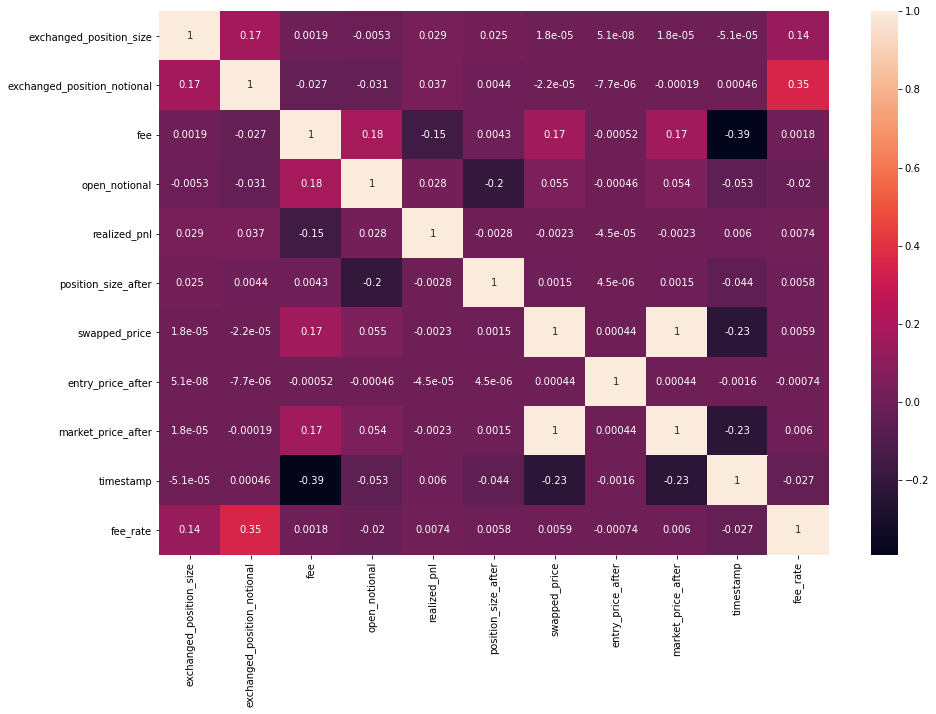

In [131]:
plt.figure(figsize=(15, 10))
sns.heatmap(scaled_numerical_position_changes_df.corr(), annot=True)
plt.show()

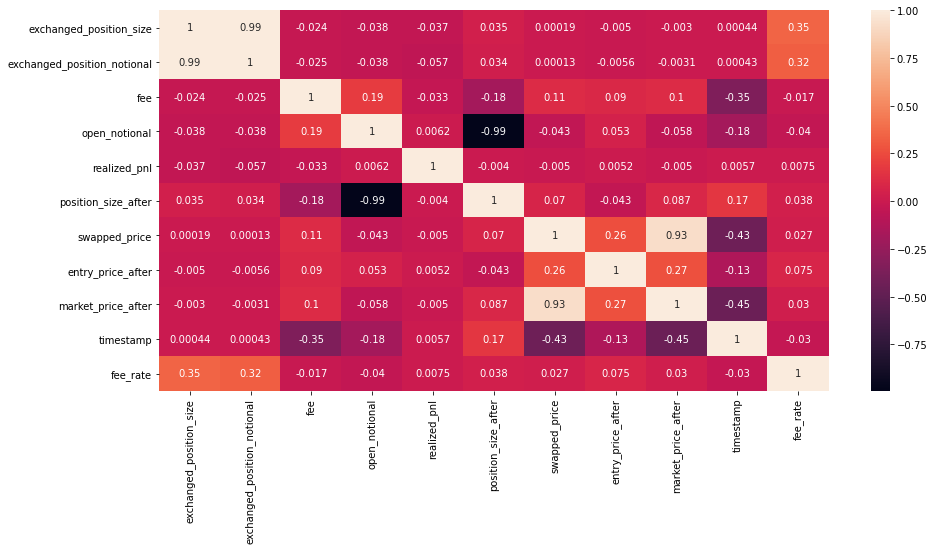

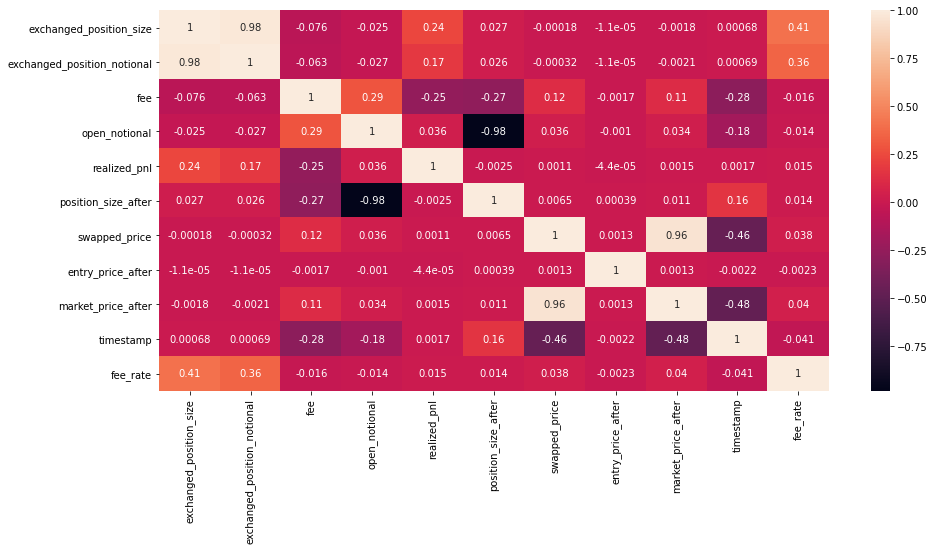

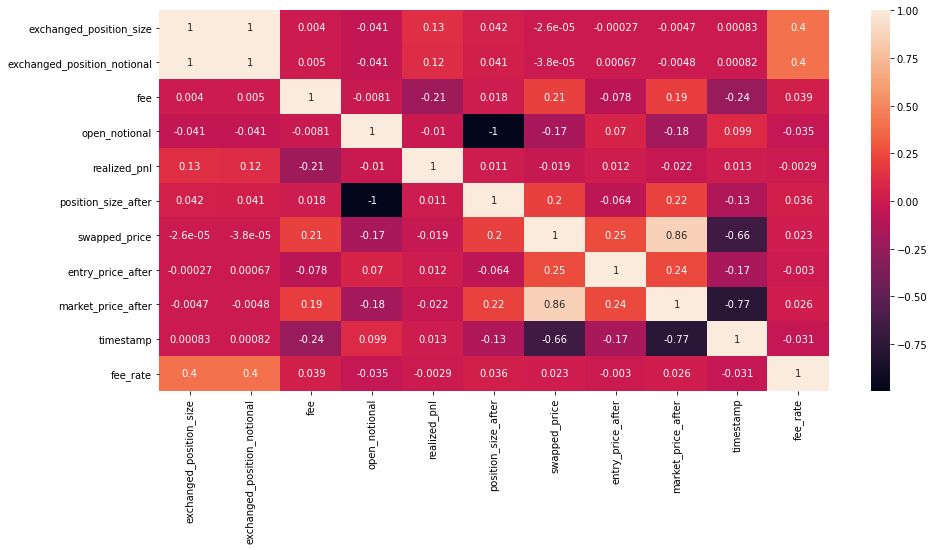

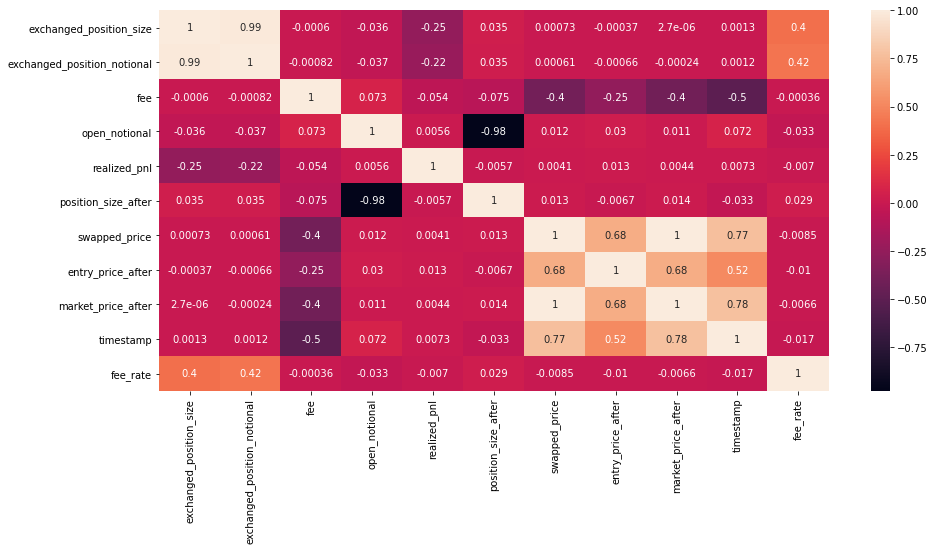

In [132]:
testing_pools = ["vBTC", "vETH", "vPERP", "vLUNA"]

for pool in testing_pools:
    test_pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    scaled_test_pool_position_changes_df = pd.DataFrame(
        standard_scaler.fit_transform(test_pool_position_changes_df[numerical_columns]),
        columns=numerical_columns
    )
    plt.figure(figsize=(15, 7))
    sns.heatmap(scaled_test_pool_position_changes_df.corr(), annot=True)
    plt.show()

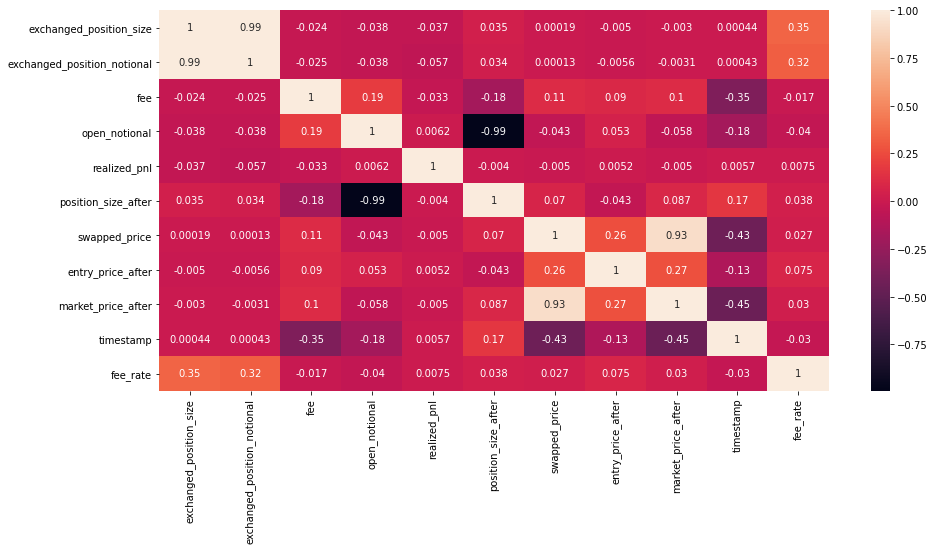

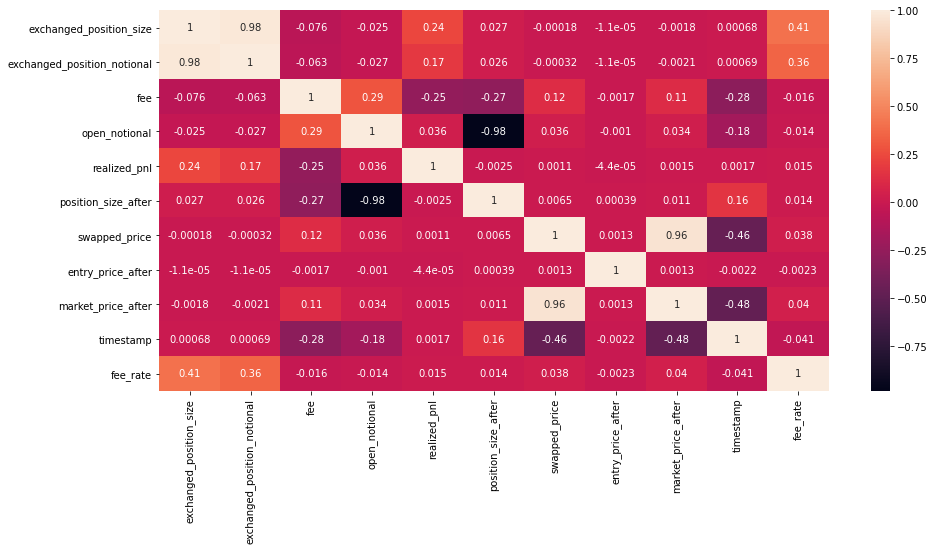

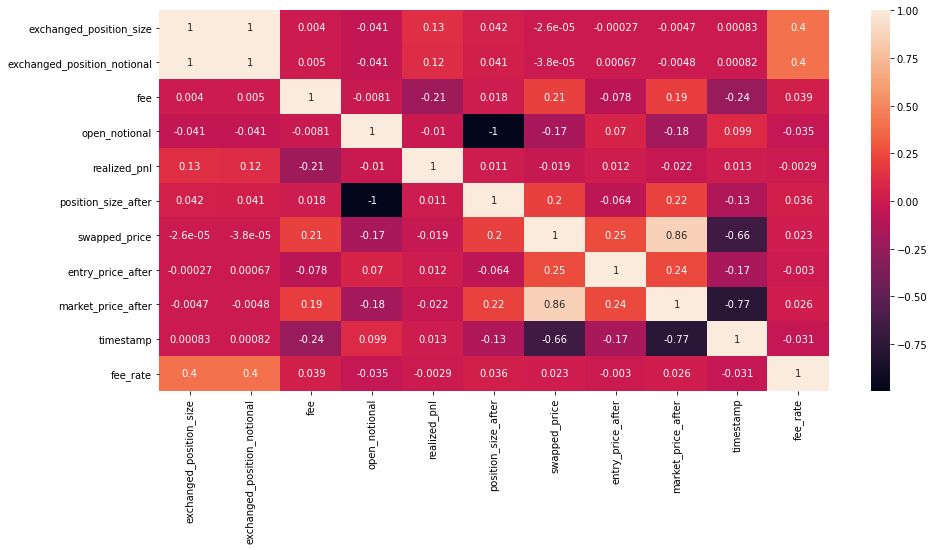

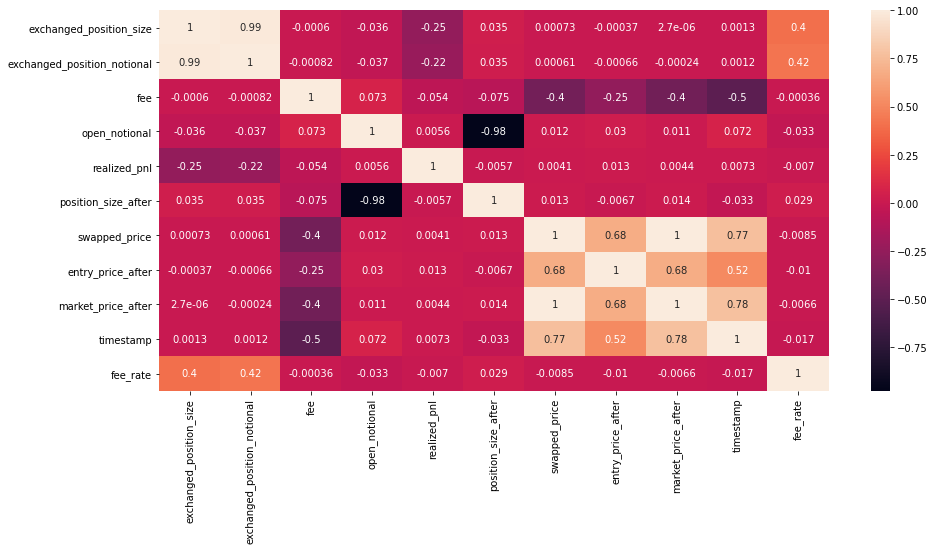

In [133]:
testing_pools = ["vBTC", "vETH", "vPERP", "vLUNA"]

for pool in testing_pools:
    test_pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    scaled_test_pool_position_changes_df = pd.DataFrame(
        min_max_scaler.fit_transform(test_pool_position_changes_df[numerical_columns]),
        columns=numerical_columns
    )
    plt.figure(figsize=(15, 7))
    sns.heatmap(scaled_test_pool_position_changes_df.corr(), annot=True)
    plt.show()

There is connection of fee with open notional, meaning that there is most likely need to check open notional distributions with other variables

## Check of the correlation heatmap for the most profitable trader on platform

In [134]:
trader_position_changes_df = position_changes_df[["trader", "realized_pnl", "fee"]].groupby("trader").sum()
trader_position_changes_df.sort_values("realized_pnl")

realized_pnl           fee
trader                                                                
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 -3.387945e+06  1.153764e+06
0xf8489bcef22d3282bb884b9e9cc708bb465c075e -1.466126e+06  4.581778e+05
0x9455b22685036d89874296460fb28de8a70a6a66 -6.883971e+05  2.276409e+03
0x70332de459d5554a9a310a7c4f7c6069c73604f9 -6.542422e+05  1.535136e+05
0x4cd804c696f54c419b75fc241a17c512bfb13df4 -6.213989e+05  1.534644e+05
...                                                  ...           ...
0x36209cad56c31332d575bed3e989c988c2ad8eee  1.602574e+05  4.248644e+04
0x57944fba39b44189f7173e70cf9ed99f2395283a  1.890892e+05  2.063380e+05
0x6541e4d0f50a82544401b1e0721626415a37de99  1.956091e+05  1.357527e+05
0x8de2e51c5e84df78fabce4134afe27b3f0116d4c  2.396276e+05  6.992023e+03
0x8a7cd6f15877a49f91189d311f026eb929228448  3.560584e+05  2.015289e+05

[11443 rows x 2 columns]

In [135]:
position_changes_df[position_changes_df["trader"] == "0x8a7cd6f15877a49f91189d311f026eb929228448"]["pool_name"].unique()

array(['vBTC', 'vETH', 'vAVAX', 'vLUNA', 'vSOL', 'vCRV', 'vATOM'],
      dtype=object)

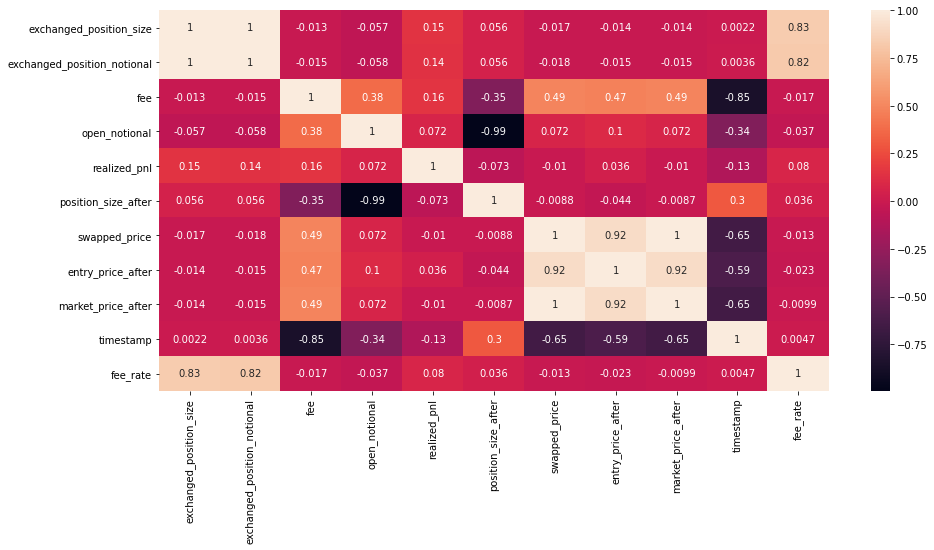

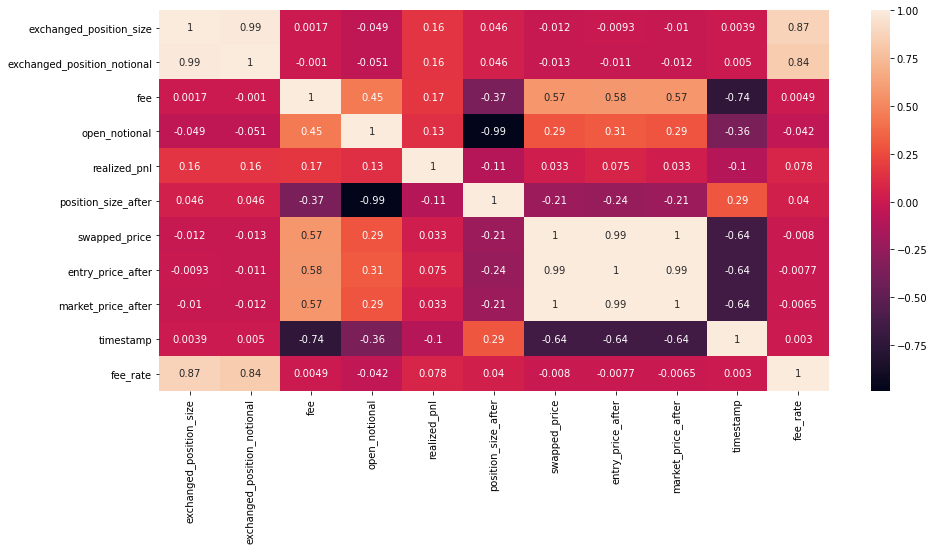

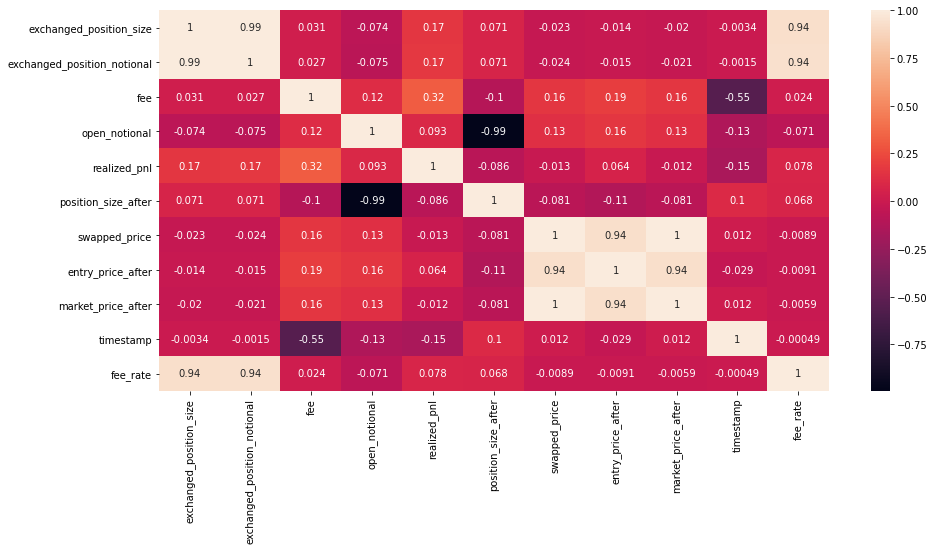

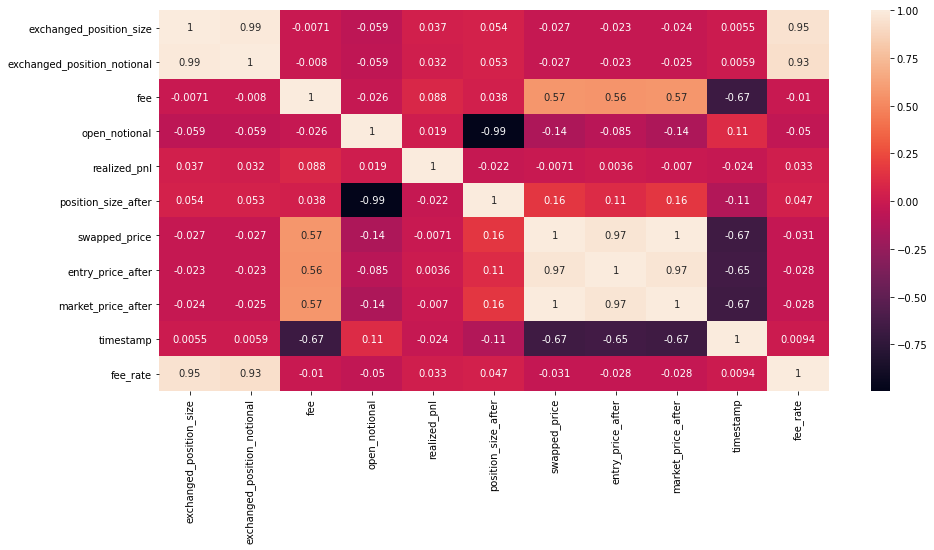

In [136]:
testing_pools = ["vBTC", "vETH", "vAVAX", "vLUNA"]
trader_position_changes_df = position_changes_df[position_changes_df["trader"] == "0x8a7cd6f15877a49f91189d311f026eb929228448"]

for pool in testing_pools:
    test_pool_position_changes_df = trader_position_changes_df[trader_position_changes_df["pool_name"] == pool]
    scaled_test_pool_position_changes_df = pd.DataFrame(
        min_max_scaler.fit_transform(test_pool_position_changes_df[numerical_columns]),
        columns=numerical_columns
    )
    plt.figure(figsize=(15, 7))
    sns.heatmap(scaled_test_pool_position_changes_df.corr(), annot=True)
    plt.show()

# Fee Rate over time

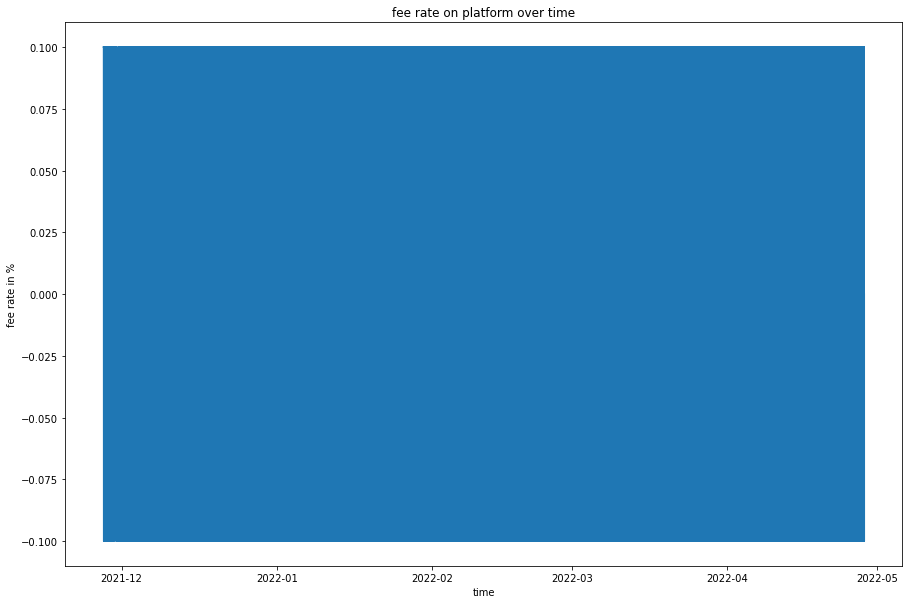

In [137]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(position_changes_df["time"], position_changes_df["fee_rate"])
ax.set_xlabel("time")
ax.set_ylabel("fee rate in %")
ax.set_title("fee rate on platform over time")
plt.show()

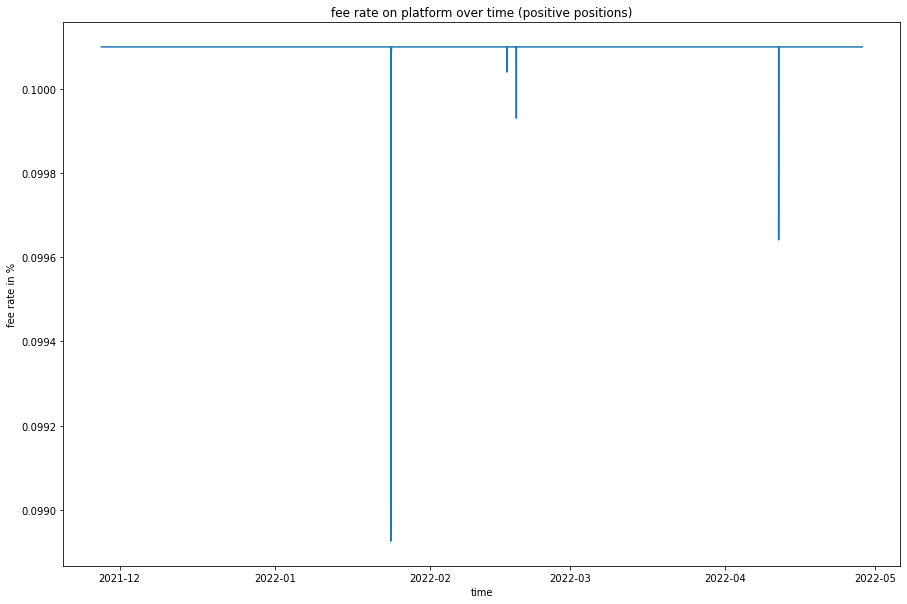

In [138]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(position_changes_df[position_changes_df["fee_rate"] > 0]["time"], 
        position_changes_df[position_changes_df["fee_rate"] > 0]["fee_rate"])
ax.set_xlabel("time")
ax.set_ylabel("fee rate in %")
ax.set_title("fee rate on platform over time (positive positions)")
plt.show()

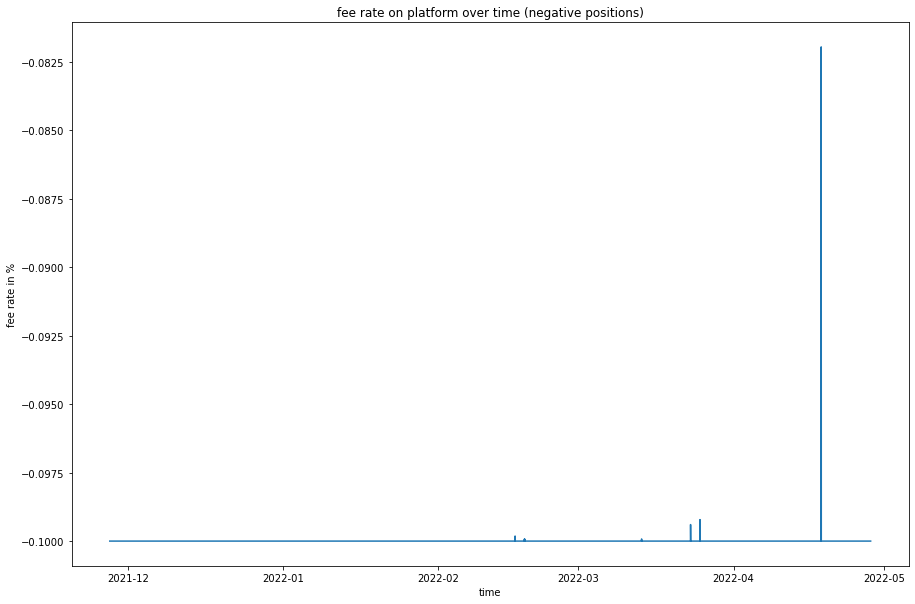

In [141]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(position_changes_df[position_changes_df["fee_rate"] < 0]["time"], 
        position_changes_df[position_changes_df["fee_rate"] < 0]["fee_rate"])
ax.set_xlabel("time")
ax.set_ylabel("fee rate in %")
ax.set_title("fee rate on platform over time (negative positions)")
plt.show()